# **I. Latar Belakang**

Amazon Web Services (AWS) adalah perusahaan teknologi berbasis cloud yang berawal dari inisiatif Amazon.com pada tahun 2006 melalui layanan Simple Storage Service (S3), dan kini berkembang menjadi penyedia solusi cloud computing berskala global untuk berbagai perusahaan lintas industri (B2B) di seluruh dunia [AWS, 2024](https://aws.amazon.com/about-aws/our-origins/). Salah satu lini produk unggulan AWS adalah perangkat lunak berbasis layanan atau **Software as a Service (SaaS)**, yang mempermudah perusahaan klien dalam mengelola kebutuhan digital tanpa harus membangun infrastruktur IT sendiri. Dataset SaaS Sales yang digunakan dalam studi ini mencerminkan data transaksi penjualan SaaS kepada klien bisnis dari berbagai industri, wilayah, dan segmen pelanggan. 

Melalui analisis data ini, dapat diungkap pola-pola penjualan, karakteristik pelanggan yang paling menguntungkan, serta faktor-faktor yang berperan penting dalam kinerja penjualan SaaS. Pemahaman tersebut menjadi dasar strategis dalam meningkatkan efektivitas pemasaran, mengoptimalkan penawaran produk, serta memaksimalkan profitabilitas dalam pasar layanan digital yang semakin kompetitif.

## **Pernyataan Masalah**

Perusahaan membutuhkan pemahaman yang lebih mendalam terkait performa bisnis dan faktor-faktor utama yang memengaruhi pengambilan keputusan strategis. Oleh karena itu, analisis difokuskan pada beberapa aspek berikut:

1. Bagaimana tren penjualan dan profit AWS SaaS dari tahun ke tahun, serta faktor-faktor utama yang memengaruhinya?
2. Produk SaaS apa yang menghasilkan margin tertinggi dan layak dijadikan fokus dalam strategi penjualan?
3. Sejauh mana pengaruh diskon terhadap profitabilitas transaksi, dan pada tingkat berapa diskon mulai menimbulkan kerugian?"
4. Bagaimana cara mengidentifikasi pelanggan paling bernilai berdasarkan profit untuk mendukung strategi retensi yang tepat sasaran?

## **Tujuan**

Berdasarkan rumusan masalah tersebut, tujuan analisis ini adalah sebagai berikut:

1. Menganalisis tren penjualan dan profit AWS SaaS dari tahun ke tahun, serta faktor-faktor utama yang memengaruhinya.
2. Menentukan produk SaaS yang menghasilkan margin tertinggi dan layak dijadikan fokus dalam strategi penjualan.
3. Mengevaluasi dampak diskon terhadap profitabilitas transaksi, dan mengidentifikasi tingkat diskon yang mulai menimbulkan kerugian.
4. Mengidentifikasi pelanggan paling bernilai berdasarkan profit untuk mendukung strategi retensi yang tepat sasaran.



# **II. Data**

Dataset **Saas Sales** ini berisi data transaksi dari sebuah perusahaan SaaS yang menjual perangkat lunak penjualan dan pemasaran kepada perusahaan lain (model B2B). Untuk menjawab pertanyaan di atas, kita akan menganalisa data transaksi yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [di sini](https://www.kaggle.com/datasets/nnthanh101/aws-saas-sales). 

Sebelum melakukan analisis, penting untuk memahami dataset terlebih dahulu melalui tahap *Data Understanding*. Melalui proses ini, kita dapat mengidentifikasi berbagai anomali yang ada dalam dataset dan perlu diperbaiki pada tahap *Data Cleaning*. Setiap tindakan perbaikan yang dilakukan akan dilengkapi dengan alasan yang jelas, baik berdasarkan *domain knowledge* maupun pertimbangan statistik.  

## **Data Understanding**

Dalam dataset ini, setiap baris merepresentasikan satu transaksi atau pesanan (sebanyak 9.994 transaksi), dengan 19 kolom sebagai berikut:

1. `Row ID`: Nomor unik untuk setiap transaksi.
2. `Order ID`: Nomor unik untuk setiap pesanan.
3. `Order Date`: Tanggal saat pesanan dilakukan.
4. `Date Key`: Representasi numerik dari tanggal pesanan (format: YYYYMMDD).
5. `Contact Name`: Nama orang yang melakukan pemesanan.
6. `Country`: Negara tempat pesanan dilakukan.
7. `City`: Kota tempat pesanan dilakukan.
8. `Region`: Wilayah tempat pesanan dilakukan.
9. `Subregion`: Subwilayah tempat pesanan dilakukan.
10. `Customer`: Nama perusahaan yang melakukan pemesanan.
11. `Customer ID`: Nomor unik untuk setiap pelanggan.
12. `Industry`: Industri tempat pelanggan berasal.
13. `Segment`: Segmen pelanggan (misalnya SMB, Strategic, Enterprise, dan sebagainya).
14. `Product`: Produk yang dipesan.
15. `License`: Kode lisensi untuk produk tersebut.
16. `Sales`: Jumlah total penjualan dari transaksi tersebut.
17. `Quantity`: Jumlah total item dalam transaksi tersebut.
18. `Discount`: Diskon yang diterapkan pada transaksi.
19. `Profit`: Keuntungan yang diperoleh dari transaksi tersebut.

Tipe data kolom-kolom dalam dataset ini:

1. Numeric Discrete: Quantity, Date Key
2. Numeric Continuous: Sales, Profit, Discount
3. Categorical Nominal: Contact Name, Country, City, Region, Subregion,Customer, Industry, Segment, Product
4. Temporal: Order Date
5. Identifier/ Non-analytical Nominal: row ID, Order ID, Customer ID, Licence

In [40]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import plotly.express as px

from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind, trim_mean, spearmanr

import warnings
warnings.filterwarnings("ignore")

### **Dataset Overview**

**Load Data**

In [2]:
df = pd.read_csv('SaaS-Sales.csv')

Berikut informasi ringkas tentang dataset, termasuk jumlah nilai non-null di setiap kolom, tipe data setiap kolom, dan penggunaan memori dataset tersebut. 

In [10]:
df.info()
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

Berikut 5 baris pertama dan terakhir dari dataset Saas Sales

In [11]:
display(df.head(),df.tail())

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200
9993,9994,AMER-2023-119914,5/5/2023,20230505,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.160,2,0.0,72.9480


### **Descriptive Summary**

Di bawah ini adalah *numerical summary* dan *categorical summary* dari database ini

In [12]:
display(df.describe(), df.describe(include='object'))

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,793,48,262,3,12,99,10,3,14,9994
top,EMEA-2023-100111,9/6/2022,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,Finance,SMB,ContactMatcher,16GRM07R1K
freq,14,38,37,2001,922,4219,2507,192,2127,5191,1842,1


In [13]:
pd.set_option('display.max_colwidth', None)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Row ID,9994,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]"
1,Order ID,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021-108966, AMER-2020-115812, EMEA-2023-114412, AMER-2022-161389, APJ-2021-118983, EMEA-2020-105893, EMEA-2020-167164, AMER-2020-143336, AMER-2022-137330, EMEA-2023-156909, EMEA-2021-106320, AMER-2022-121755, EMEA-2021-150630, APJ-2023-107727, APJ-2022-117590, APJ-2021-117415, APJ-2023-120999, AMER-2022-101343, EMEA-2023-139619, EMEA-2022-118255, AMER-2020-146703, APJ-2022-169194, APJ-2021-115742, EMEA-2022-105816, EMEA-2022-111682, AMER-2021-135545, APJ-2021-164175, AMER-2020-106376, EMEA-2022-119823, EMEA-2022-106075, AMER-2023-114440, EMEA-2021-134026, APJ-2023-118038, APJ-2020-147606, EMEA-2022-127208, AMER-2020-139451, EMEA-2021-149734, APJ-2023-119662, AMER-2023-140088, EMEA-2023-155558, APJ-2022-159695, AMER-2022-109806, EMEA-2021-149587, EMEA-2023-109484, EMEA-2023-161018, AMER-2023-157833, EMEA-2022-149223, APJ-2022-158568, EMEA-2022-129903, EMEA-2021-156867, EMEA-2023-119004, APJ-2021-129476, EMEA-2023-146780, EMEA-2022-128867, AMER-2020-115259, AMER-2021-110457, EMEA-2021-136476, APJ-2022-103730, APJ-2020-152030, APJ-2020-134614, AMER-2023-107272, AMER-2022-125969, AMER-2023-164147, AMER-2022-145583, EMEA-2022-110366, AMER-2023-106180, EMEA-2023-155376, AMER-2021-110744, AMER-2020-110072, EMEA-2022-114489, AMER-2022-158834, AMER-2021-124919, AMER-2021-118948, AMER-2020-104269, APJ-2022-114104, AMER-2022-162733, EMEA-2021-119697, APJ-2022-154508, AMER-2022-113817, APJ-2020-139892, AMER-2020-118962, APJ-2020-100853, APJ-2023-152366, AMER-2021-101511, EMEA-2021-137225, APJ-2020-166191, EMEA-2020-158274, EMEA-2022-105018, AMER-2020-123260, APJ-2022-157000, EMEA-2021-102281, AMER-2021-131457, AMER-2020-140004, AMER-2023-107720, EMEA-2023-124303, AMER-2023-105074, EMEA-2020-133690, APJ-2023-116701, ...]"
2,Order Date,1237,"[11/9/2022, 6/13/2022, 10/11/2021, 6/9/2020, 4/16/2023, 12/6/2022, 11/22/2021, 11/11/2020, 5/13/2020, 8/27/2020, 12/10/2022, 7/17/2023, 9/25/2021, 1/16/2022, 9/17/2021, 10/20/2023, 12/9/2022, 12/27/2021, 9/11/2023, 7/18/2022, 9/20/2023, 3/12/2022, 10/20/2020, 6/21/2022, 4/18/2021, 12/12/2022, 6/18/2022, 11/24/2021, 4/30/2021, 12/5/2020, 6/5/2022, 9/19/2022, 9/15/2023, 4/26/2021, 12/10/2023, 11/26/2020, 10/12/2020, 9/3/2021, 11/14/2023, 5/29/2023, 10/27/2023, 4/6/2022, 9/18/2022, 1/31/2021, 11/7/2023, 11/10/2023, 6/18/2023, 9/7/2022, 8/30/2022, 12/2/2022, 11/13/2021, 11/24/2023, 10/15/2021, 12/26/2023, 11/4/2022, 8/25/2020, 3/2/2021, 4/5/2021, 12/26/2020, 9/20/2020, 11/6/2023, 11/7/2022, 2/3/2023, 10/14/2022, 9/6/2022, 9/19/2023, 12/23/2023, 9/7/2021, 10/22/2020, 3/14/2022, 5/31/2021, 5/28/2021, 3/1/2020, 11/21/2022, 5/12/2022, 12/28/2021, 11/17/2022, 11/8/2022, 9/8/2020, 8/5/2020, 9/14/2020, 4/22/2023, 11/21/2021, 12/15/2021, 11/19/2020, 11/29/2022, 8/26/2020, 7/17/2022, 10/12/2021, 10/31/2021, 3/21/2020, 7/7/2023, 6/25/2023, 8/3/2020, 12/18/2023, 6/4/2023, 12/2/2023, 2/9/2021, 1/2/2021, 10/29/2022, ...]"
3,Date Key,1237,"[20221109, 20220613, 20211011, 20200609, 20230416, 20221206, 20211122, 20201111, 20200513, 20200827, 20221210, 20230717, 20210925, 20220116, 20210917, 20231020, 20221209, 20211227, 20230911, 20220718, 20230920, 20220312, 20201020, 20220621, 20210418, 20221212, 20220618, 20211124, 20210430, 20201205, 20220605, 20220919, 20230915, 20210426, 20231210, 20201126, 20201012, 20210903, 20231114, 20230529, 20231027, 20220406, 20220918, 20210131, 20231107, 20231110, 20230618, 20220907, 20220830, 20221202, 20211113, 20231124, 20211015, 20231226, 20221104, 20200825, 20210302, 20210405, 202

**Insight dari Descriptive Summary**

1. Data mencakup periode dari 2020 hingga 2023
2. Ada 99 pelanggan unik (lihat bagian categorical), dan nilai Customer ID berkisar dari 1001 hingga 1101 — kemungkinan ID urut.
3. Pada kolom `Sales` terlihat rata-rata transaksi adalah $229.86, tetapi nilai maksimal mencapai $22,638.48, menunjukkan adanya transaksi yang sangat besar (outlier).
4. Pada kolom `Profit` terlihat rata-rata profit $28.66, tapi nilai minimum mencapai -$6,599.98, mengindikasikan beberapa transaksi merugi besar, mungkin karena diskon besar atau kesalahan pricing.
5. Rata-rata diskon adalah 15.6%, namun bisa setinggi 80%. Banyak transaksi yang tidak mendapat diskon (nilai minimum = 0).
6. Rata-rata barang per transaksi adalah 3.79 unit, dengan maksimum 14 unit. Ada kemungkinan bundling atau pembelian massal.
7. Terdapat 5.009 order unik dari 9.994 baris, berarti rata-rata satu order memiliki 2 produk.
8. Mayoritas transaksi berasal dari United States (2.001 transaksi).
9. London paling banyak muncul (922 transaksi), mengindikasikan hotspot penjualan.
10. `Industry` : Finance adalah sektor dominan (2.127 transaksi), peluang besar untuk fokus pasar.
11. `Segment` : SMB (Small-Medium Business) mendominasi (5.191 transaksi) cocok untuk segmentasi pasar.

**Hal Menarik**

1. Profit negatif perlu kita diselidiki lebih lanjut: Apakah karena kombinasi diskon tinggi dan quantity rendah?
2. Distribusi Quantity menunjukkan dominansi transaksi kecil (median = 3), tetapi ada kasus pembelian besar (14 unit).
3. Terdapat pelanggan setia, terlihat dari frekuensi order oleh beberapa customer/contact name tertentu.
4. Dominasi SMB dan sektor Finance menunjukkan posisi pasar utama yang bisa diperkuat dengan strategi upselling/cross-selling.

## **Data Cleaning**

Sebelum melakukan analisis lebih lanjut, tahap *data cleaning* sangat penting untuk memastikan kualitas dan validitas data. Pada tahap ini, permasalahan umum data yang perlu ditangani meliputi:  
1. **Missing Value** – Memastikan tidak ada data yang hilang pada kolom-kolom penting.  
2. **Duplicates** – Mengidentifikasi dan menghapus data duplikat agar analisis tidak bias.  
3. **Data Format** – Menyesuaikan tipe data, seperti mengubah tanggal dari format string ke datetime.  
4. **Outliers** – Mendeteksi dan menangani nilai-nilai ekstrem yang dapat mempengaruhi hasil analisis.  
5. **Inconsistent/Ambiguous Data** – Memperbaiki data yang tidak konsisten atau ambigu, seperti penamaan kategori yang berbeda untuk entitas yang sama.
6. **Rendundant Data / Column** - Menyederhanakan dataset, menghemat memori, dan memastikan analisis lebih akurat serta efisien.

### **Missing Value**

In [8]:
df.isnull().sum()


Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Tidak ditemukan missing value di kolom manapun pada dataset ini

### **Duplicates**

In [9]:
df.duplicated().sum()


0

Tidak ditemukan juga data duplikat di dataset ini

### **Data Format Issues**

In [10]:
df.dtypes


Row ID            int64
Order ID         object
Order Date       object
Date Key          int64
Contact Name     object
Country          object
City             object
Region           object
Subregion        object
Customer         object
Customer ID       int64
Industry         object
Segment          object
Product          object
License          object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [12]:
df['Order Date'].head(10)


0     11/9/2022
1     11/9/2022
2     6/13/2022
3    10/11/2021
4    10/11/2021
5      6/9/2020
6      6/9/2020
7      6/9/2020
8      6/9/2020
9      6/9/2020
Name: Order Date, dtype: object

Variabel `Order Date` masih bertipe **object(string)**, perlu diubah ke tipe data **datetime**.
Untuk tipe data variabel lain sudah aman

In [3]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [14]:
df['Order Date'].head(10)


0   2022-11-09
1   2022-11-09
2   2022-06-13
3   2021-10-11
4   2021-10-11
5   2020-06-09
6   2020-06-09
7   2020-06-09
8   2020-06-09
9   2020-06-09
Name: Order Date, dtype: datetime64[ns]

Sekarang `Order Date` sudah bertipe datetime

### **Outliers**

Identifikasi outliers pada `Sales`, `Profit`, `Discount`, dan `Quantity` menggunakan boxplot dan IQR method.

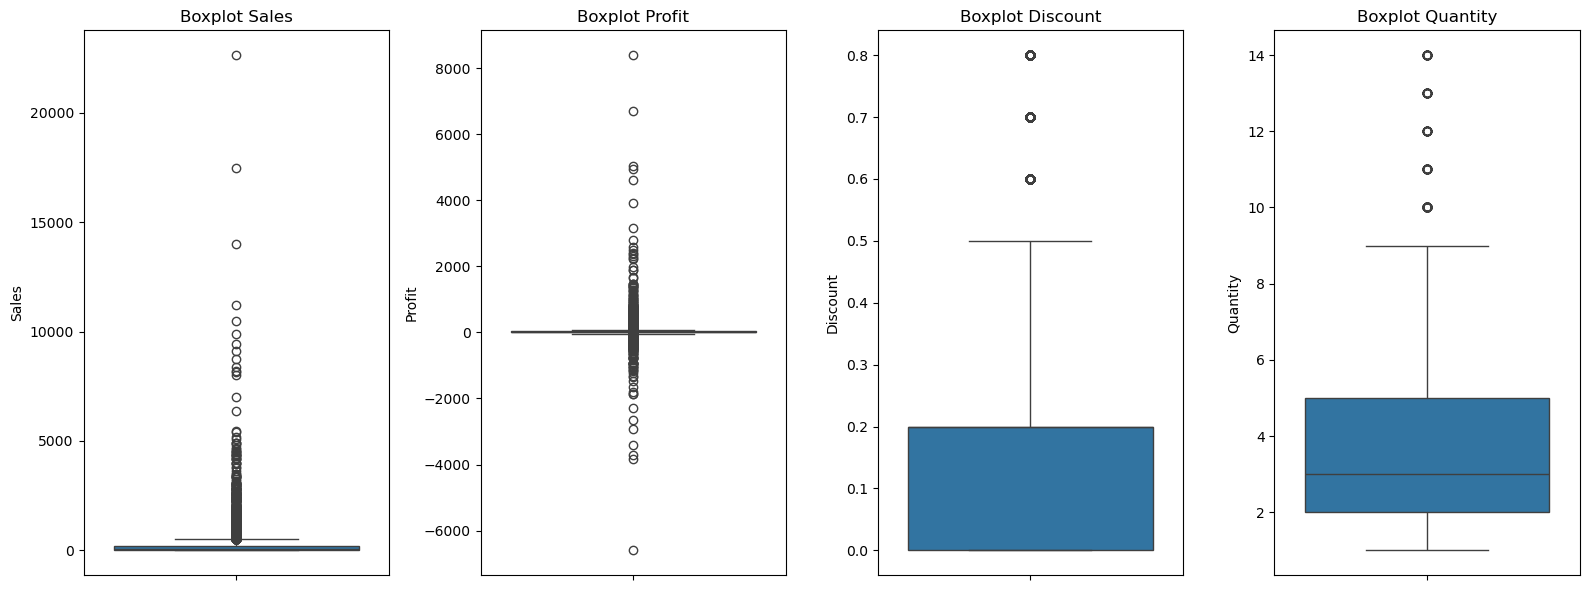

In [17]:
num_variables = ['Sales', 'Profit', 'Discount', 'Quantity']
plt.figure(figsize=(16, 6))
for i, col in enumerate(num_variables, 1):
    plt.subplot(1, 4, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

In [27]:
iqr_outlier_summary = []

for var in num_variables:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers_below = (df[var] < lower).sum()
    outliers_above = (df[var] > upper).sum()
    n_outlier = outliers_below + outliers_above
    percent = n_outlier / len(df) * 100
    iqr_outlier_summary.append([
        var, round(Q1, 2), round(Q3, 2), round(IQR, 2), round(lower, 2), round(upper, 2),
        outliers_below, outliers_above, n_outlier, f"{percent:.2f}%"
    ])

iqr_outlier_table = pd.DataFrame(
    iqr_outlier_summary,
    columns=[
        'Variabel', 'Q1', 'Q3', 'IQR', 'Lower Bound', 'Upper Bound',
        'Outliers Below', 'Outliers Above', 'Total Outliers', '% Outlier'
    ]
)
display(iqr_outlier_table)

,Variabel,Q1,Q3,IQR,Lower Bound,Upper Bound,Outliers Below,Outliers Above,Total Outliers,% Outlier
0,Sales,17.28,209.94,192.66,-271.71,498.93,0,1167,1167,11.68%
1,Profit,1.73,29.36,27.64,-39.72,70.82,604,1277,1881,18.82%
2,Discount,0.00,0.20,0.20,-0.30,0.50,0,856,856,8.57%
3,Quantity,2.00,5.00,3.00,-2.50,9.50,0,170,170,1.70%


**Insight dari Boxplot Outlier Analysis:**

1. **Sales:**  Banyak outlier pada Sales (11.7%), dengan beberapa transaksi bernilai sangat tinggi dibanding mayoritas transaksi lainnya, Mayoritas transaksi memiliki nilai Sales yang relatif kecil, namun ada transaksi dengan nilai Sales ekstrem (right-skewed).

2. **Profit:**  Distribusi Profit juga menunjukkan banyak outlier (18.8%), baik pada sisi positif maupun negatif. Terdapat transaksi dengan kerugian besar (profit negatif ekstrem), kemungkinan akibat diskon besar atau pricing error.

3. **Discount:**  Sebagian besar transaksi tidak mendapat diskon (nilai 0), namun ada kelompok transaksi dengan diskon tinggi (hingga 80%). Outlier pada Discount menunjukkan adanya kebijakan diskon khusus pada sebagian kecil transaksi.

4. **Quantity:**  Mayoritas transaksi melibatkan pembelian dalam jumlah kecil (1-3 unit), namun terdapat beberapa transaksi dengan quantity jauh lebih besar (outlier 1.7%). namun terdapat pembelian besar (hingga 14 unit) yang perlu dicermati, misal untuk promo/bundling.

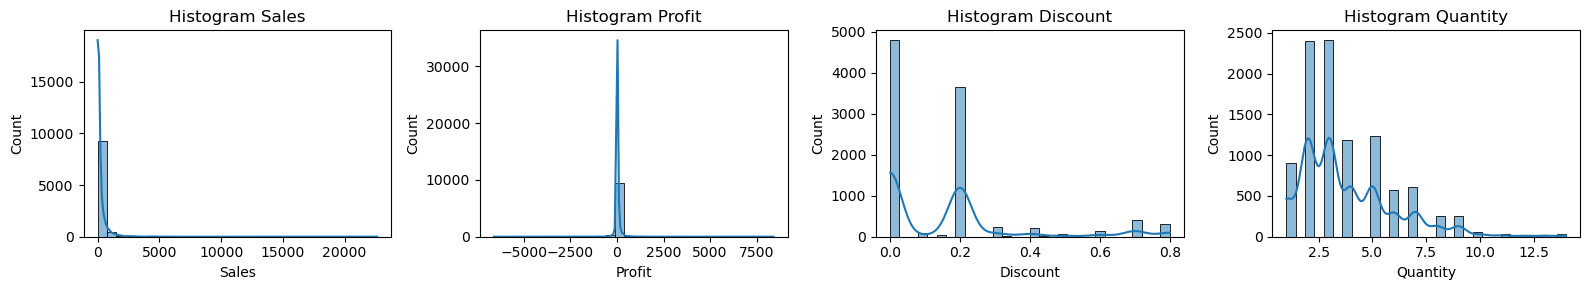

Uji Normalitas untuk Sales:
p-value: 0.0000
Tolak H0: Data TIDAK berdistribusi normal

Uji Normalitas untuk Profit:
p-value: 0.0000
Tolak H0: Data TIDAK berdistribusi normal

Uji Normalitas untuk Discount:
p-value: 0.0000
Tolak H0: Data TIDAK berdistribusi normal

Uji Normalitas untuk Quantity:
p-value: 0.0000
Tolak H0: Data TIDAK berdistribusi normal



In [23]:
fig, axes = plt.subplots(1, 4, figsize=(16, 3))
normality_results = []

for i, var in enumerate(num_variables):
    sns.histplot(df[var], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')

    stat, p = normaltest(df[var])
    normality_results.append((var, p))

plt.tight_layout()
plt.show()

for var, p in normality_results:
    print(f'Uji Normalitas untuk {var}:')
    print(f'p-value: {p:.4f}')
    if p < 0.05:
        print('Tolak H0: Data TIDAK berdistribusi normal\n')
    else:
        print('Gagal Tolak H0: Data berdistribusi normal\n')


Hasil uji normalitas menunjukkan variabel numerik (Sales, Profit, Discount, Quantity) tidak berdistribusi normal (p-value < 0.05). Banyaknya outlier yang terdeteksi (IQR method) memperkuat temuan ini. 

Selanjutnya, kita akan membandingkan outliers antar variabel (sales, profit, discount, quantity) dengan standardisasi data menggunakan z-score. z-score mempertimbangkan penyimpangan data terhadap rata-rata dan standar deviasi, tidak terpengaruh oleh skala atau distribusi data mentah yang tidak terdistribusi normal. Boxplot z-score membantu visualisasi outlier berdasarkan aturan statistik universal, bukan hanya berdasarkan distribusi data mentah yang bisa sangat skewed.

Keputusan untuk membuang atau mempertahankan outlier akan disesuaikan.

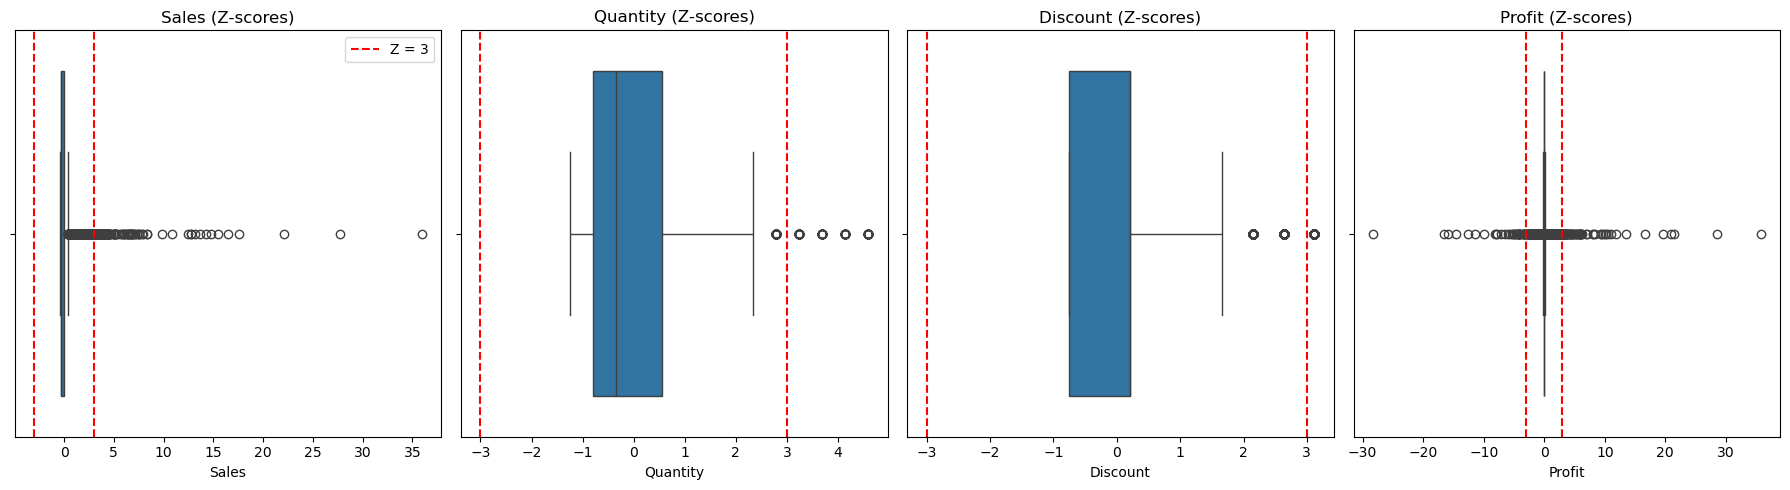

In [29]:
from scipy.stats import zscore
num_variables = ['Sales', 'Quantity', 'Discount', 'Profit']
# Menghitung Z-scores untuk setiap variabel numerik
z_scores_selected = df[num_variables].apply(zscore)

plt.figure(figsize=(18, 5))

for i, column in enumerate(num_variables, 1):
    plt.subplot(1, 4, i)
    sns.boxplot(x=z_scores_selected[column], orient='h')
    plt.axvline(x=3, color='red', linestyle='--', label='Z = 3')
    plt.axvline(x=-3, color='red', linestyle='--')
    plt.title(f"{column} (Z-scores)")
    if i == 1:
        plt.legend()

plt.tight_layout()
plt.show()

**Insight dari boxplot z-score:**

1. Hampir semua variabel numerik (`Sales`, `Profit`, `Discount`, `Quantity`) memiliki sejumlah data dengan z-score di luar rentang -3 hingga 3, menandakan keberadaan outlier secara statistik.
2. Outlier paling banyak ditemukan pada variabel `Sales` dan `Profit`, yang konsisten dengan temuan sebelumnya menggunakan IQR.
3. Distribusi outlier pada `Discount` dan `Quantity` relatif lebih sedikit, namun tetap ada beberapa transaksi ekstrem.

**Keputusan:**

Outlier pada dataset ini mencerminkan transaksi besar, diskon khusus, atau pembelian massal yang memang wajar terjadi dalam bisnis SaaS B2B. Karena outlier ini bisa merepresentasikan perilaku bisnis nyata (bukan error input), maka:
- Outlier **TIDAK dihapus**, agar analisis tetap mencerminkan kondisi bisnis sesungguhnya.
- Center of data pada pengerjaan ini tidak akan menggunakan mean karena tidak mencerminkan kondisi sebagian besar data. akan menggunakan median
- Namun, untuk analisis statistik tertentu (misal rata-rata), akan digunakan juga metrik robust (median/IQR) dan visualisasi distribusi agar hasil tidak bias oleh outlier ekstrem.

### **Inconsistent / Ambiguous Data**

In [30]:
# Cek data tidak konsisten/ambigu pada kolom kategorikal utama
categorical_cols = ['Country', 'City', 'Region', 'Subregion', 'Customer', 'Industry', 'Segment', 'Product']

for col in categorical_cols:
    print(f"Kolom: {col}")
    print("Jumlah kategori unik:", df[col].nunique())
    print("Contoh nilai unik:", df[col].unique()[:10])
    print("-" * 60)

# Cek kemungkinan penulisan berbeda untuk entitas yang sama (case sensitivity, spasi, dsb)
for col in categorical_cols:
    print(f"Nilai unik (casefolded & strip) di kolom {col}:")
    cleaned = df[col].astype(str).str.strip().str.casefold()
    dup = cleaned.value_counts()[cleaned.value_counts() > 1]
    if dup.empty:
        print("Tidak ada indikasi duplikasi penulisan.")
    else:
        print(dup.head())
    print("-" * 60)

Kolom: Country
Jumlah kategori unik: 48
Contoh nilai unik: ['Ireland' 'United States' 'Germany' 'Sweden' 'Canada' 'Japan' 'Italy'
 'Turkey' 'Costa Rica' 'France']
------------------------------------------------------------
Kolom: City
Jumlah kategori unik: 262
Contoh nilai unik: ['Dublin' 'New York City' 'Stuttgart' 'Stockholm' 'Toronto' 'Saitama'
 'Naples' 'Ankara' 'Los Angeles' 'San José']
------------------------------------------------------------
Kolom: Region
Jumlah kategori unik: 3
Contoh nilai unik: ['EMEA' 'AMER' 'APJ']
------------------------------------------------------------
Kolom: Subregion
Jumlah kategori unik: 12
Contoh nilai unik: ['UKIR' 'NAMER' 'EU-WEST' 'NOR' 'JAPN' 'EU' 'MEA' 'LATAM' 'ANZ' 'APAC']
------------------------------------------------------------
Kolom: Customer
Jumlah kategori unik: 99
Contoh nilai unik: ['Chevron' 'Phillips 66' 'Royal Dutch Shell' 'BNP Paribas' 'Engie'
 'Microsoft' 'Pfizer' 'Toyota Motor' 'Home Depot' 'Wells Fargo']
-----------------

 Tidak ditemukan indikasi data ambigu atau tidak konsisten pada kolom kategorikal utama. Semua nilai unik pada kolom-kolom tersebut sudah konsisten (tidak ada perbedaan penulisan karena case sensitivity atau spasi). Data kategori sudah rapi dan tidak ada duplikasi penamaan entitas yang sama.

### **Redundant Column**

Kolom `Date Key` dihapus saja karena berisi informasi yang sama dengan `Order Date`, sehingga dianggap sebagai data redundan dan tidak diperlukan untuk analisis lebih lanjut.

In [4]:
df = df.drop(columns=['Date Key'])

In [35]:
df.head()

,Row ID,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


Kolom `Row ID` juga akan dihapus karena hanya berfungsi sebagai penomoran urut baris (index) dan yang mana keberadaannya redundant dengan index DataFrame bawaan pandas, sehingga aman untuk dihapus agar dataset lebih ringkas dan fokus pada fitur yang relevan.

In [6]:
df = df.drop(columns=['Row ID'])

In [5]:
df.head()

,Row ID,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


### **Cleaned Data**

Dataset `df` saat ini terdiri dari **17 kolom** dengan menghapus kolom redundan (date key, row ID). Outliers yang ditemukan tidak dibuang karena merepresentasikan perilaku bisnis nyata (bukan error input) agar analisis tetap mencerminkan kondisi bisnis sesungguhnya.

In [6]:
df.to_csv('Saas Sales_cleaned.csv', index=False)

# **III. Data Analysis**

Analisis data: bertujuan untuk menjawab rumusan masalah dan mencapai tujuan yang telah ditetapkan sebelumnya.

## **1. Tren Penjualan dan Profit**

Analisis tren penjualan dan profit secara periodik sangat penting untuk memahami pertumbuhan bisnis, mengidentifikasi pola musiman, serta mendeteksi adanya penurunan atau lonjakan kinerja yang signifikan. Dengan melihat tren dari waktu ke waktu, perusahaan dapat mengambil keputusan strategis berbasis data, seperti menentukan periode promosi, mengantisipasi penurunan penjualan, atau mengevaluasi efektivitas strategi bisnis yang telah dijalankan.

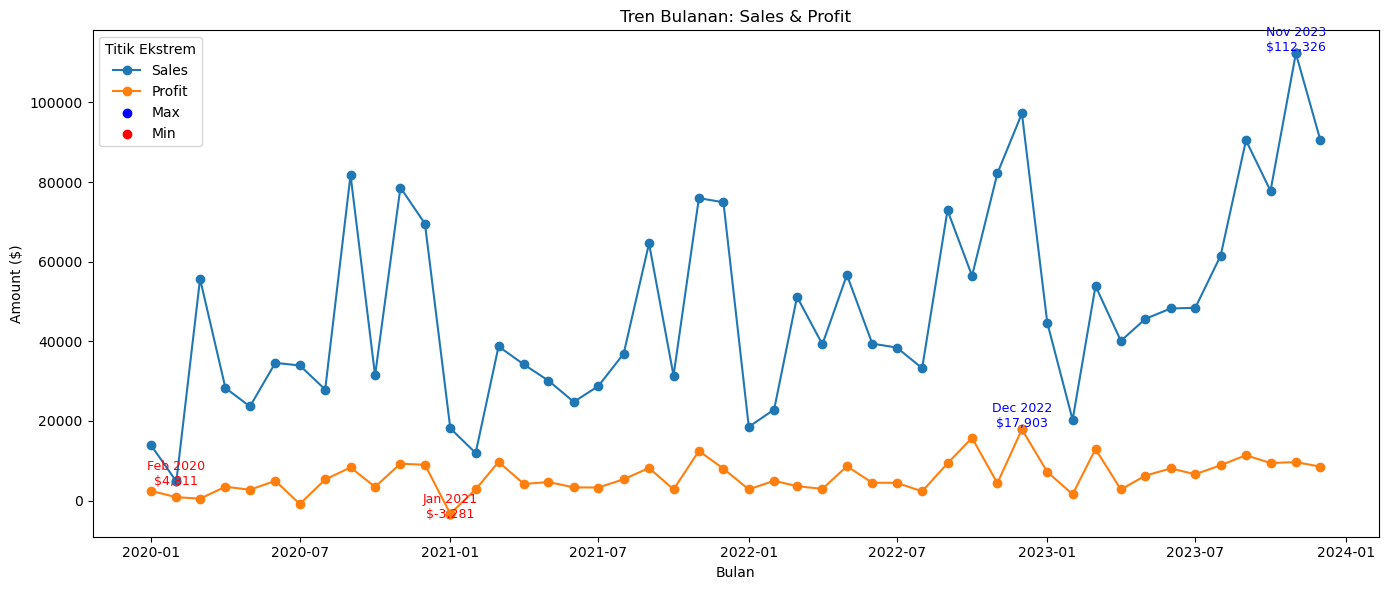

In [ ]:
# Ekstraksi waktu
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Quarter'] = df['Order Date'].dt.to_period('Q')

# Agregasi bulanan
monthly_trend = df.groupby(df['Order Date'].dt.to_period('M')).agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum'
}).reset_index()
monthly_trend['Order Date'] = monthly_trend['Order Date'].dt.to_timestamp()

# Agregasi tahunan
yearly_trend = df.groupby('Year').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum'
}).reset_index()

# Plot Tren Bulanan Sales & Profit
plt.figure(figsize=(14, 6))
plt.plot(monthly_trend['Order Date'], monthly_trend['Sales'], marker='o', label='Sales')
plt.plot(monthly_trend['Order Date'], monthly_trend['Profit'], marker='o', label='Profit')

# Titik tertinggi & terendah Sales
max_sales_idx = monthly_trend['Sales'].idxmax()
min_sales_idx = monthly_trend['Sales'].idxmin()
plt.scatter(monthly_trend.loc[max_sales_idx, 'Order Date'], monthly_trend.loc[max_sales_idx, 'Sales'],
            color='blue', label='Max')
plt.scatter(monthly_trend.loc[min_sales_idx, 'Order Date'], monthly_trend.loc[min_sales_idx, 'Sales'],
            color='red', label='Min')

plt.text(monthly_trend.loc[max_sales_idx, 'Order Date'],
         monthly_trend.loc[max_sales_idx, 'Sales'] + 500,
         f"{monthly_trend.loc[max_sales_idx, 'Order Date'].strftime('%b %Y')}\n${monthly_trend.loc[max_sales_idx, 'Sales']:,.0f}",
         ha='center', color='blue', fontsize=9)

plt.text(monthly_trend.loc[min_sales_idx, 'Order Date'],
         monthly_trend.loc[min_sales_idx, 'Sales'] - 1000,
         f"{monthly_trend.loc[min_sales_idx, 'Order Date'].strftime('%b %Y')}\n${monthly_trend.loc[min_sales_idx, 'Sales']:,.0f}",
         ha='center', color='red', fontsize=9)

# Titik tertinggi & terendah Profit
max_profit_idx = monthly_trend['Profit'].idxmax()
min_profit_idx = monthly_trend['Profit'].idxmin()
plt.scatter(monthly_trend.loc[max_profit_idx, 'Order Date'], monthly_trend.loc[max_profit_idx, 'Profit'],
            color='blue')
plt.scatter(monthly_trend.loc[min_profit_idx, 'Order Date'], monthly_trend.loc[min_profit_idx, 'Profit'],
            color='red')

plt.text(monthly_trend.loc[max_profit_idx, 'Order Date'],
         monthly_trend.loc[max_profit_idx, 'Profit'] + 500,
         f"{monthly_trend.loc[max_profit_idx, 'Order Date'].strftime('%b %Y')}\n${monthly_trend.loc[max_profit_idx, 'Profit']:,.0f}",
         ha='center', color='blue', fontsize=9)

plt.text(monthly_trend.loc[min_profit_idx, 'Order Date'],
         monthly_trend.loc[min_profit_idx, 'Profit'] - 1000,
         f"{monthly_trend.loc[min_profit_idx, 'Order Date'].strftime('%b %Y')}\n${monthly_trend.loc[min_profit_idx, 'Profit']:,.0f}",
         ha='center', color='red', fontsize=9)

# Finalisasi plot
plt.title('Tren Bulanan: Sales & Profit')
plt.xlabel('Bulan')
plt.ylabel('Amount ($)')
plt.legend(title='Titik Ekstrem')
plt.tight_layout()
plt.show()


Insight:  

1. Penjualan meningkat tiap akhir tahun dan ada pertumbuhan eksplosif di akhir 2023 – Penjualan melonjak drastis pada **Nov 2023 ($112K)**, hampir **6x lebih tinggi** dari puncak sebelumnya (Dec 2022: $17.9K). Mungkin dipicu oleh strategi akhir tahun (discount, campaign besar, atau peluncuran produk baru).  

2. Meski sales tinggi di 2023, profit belum tentu mengikuti (grafik profit tidak disebutkan nilainya). Perlu dicek apakah kenaikan sales berasal dari diskon besar yang menggerus margin.  

3. Tren 2020-2022 Stabil tapi rendah – Periode ini tidak ada lonjakan signifikan, menunjukkan mungkin ada perubahan strategi atau pasar di 2023 yang berhasil.  

Catatan: perlu analisis membandinkan dengan data profit, sales tinggi ≠ sehat jika margin turun drastis.

Berikut kita akan melihat total profit tiap tahun, kapan waktu profit minus atau merugi, dan proporsi untung rugi per tahun

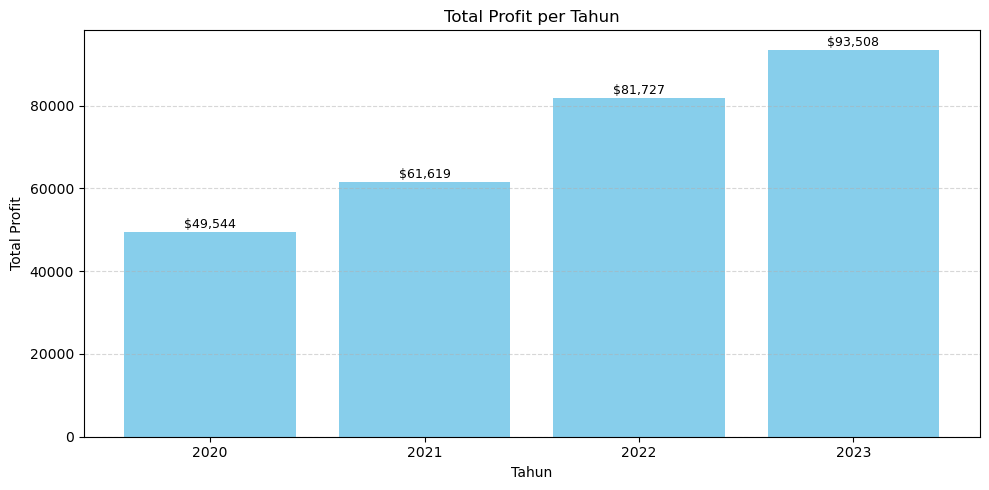

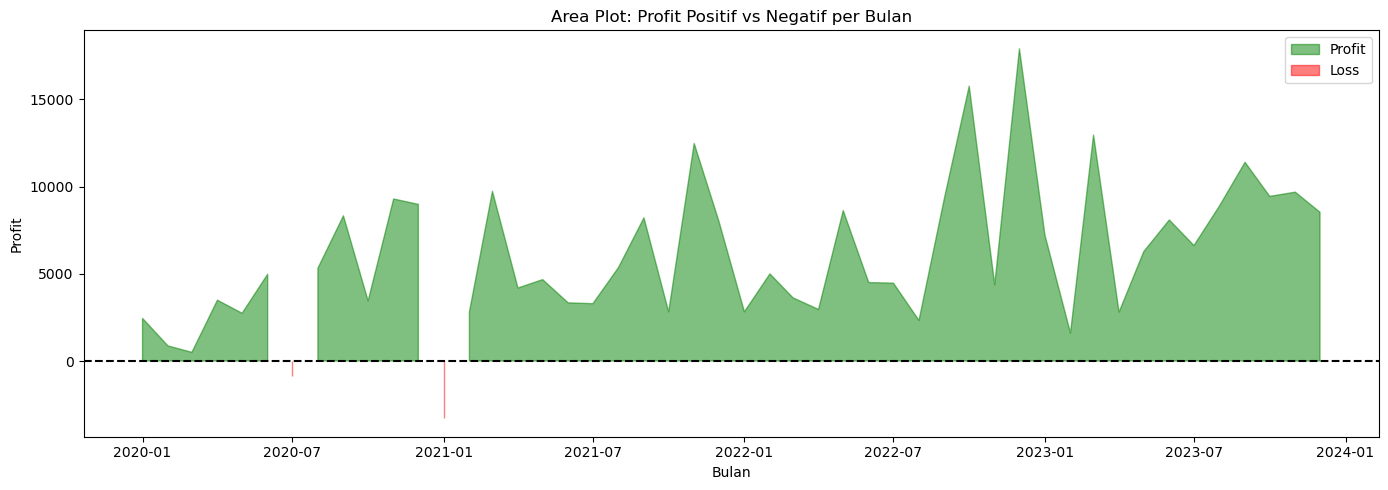

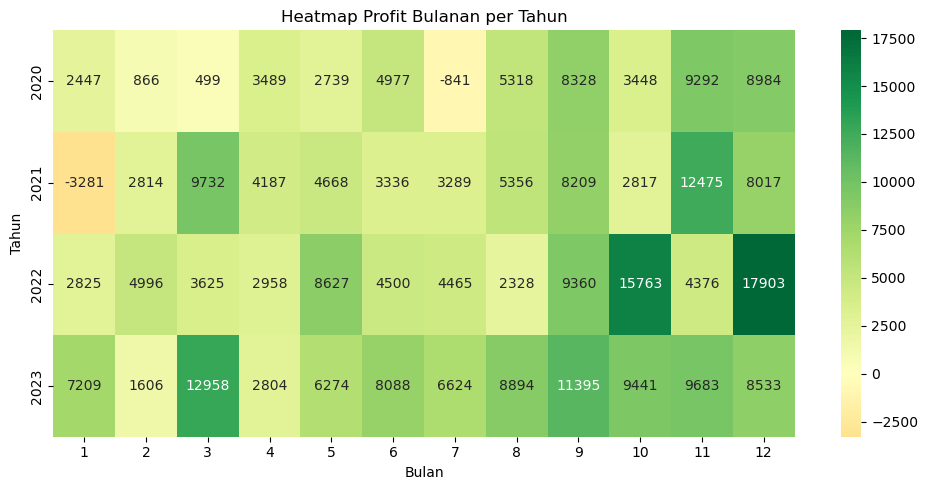

Periode dengan profit negatif (rugi):


,Order Date,Profit
6,2020-07-01,-841.4826
12,2021-01-01,-3281.0070


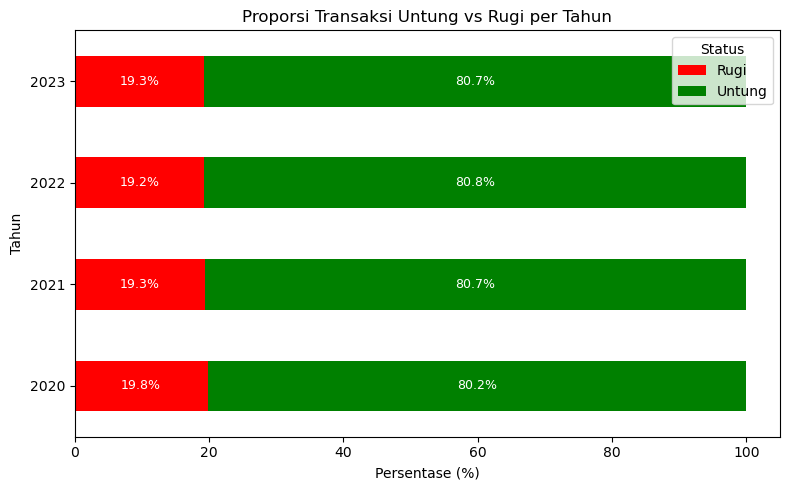

In [ ]:
# Bar chart
plt.figure(figsize=(10, 5))
bars = plt.bar(yearly_trend['Year'].astype(str), yearly_trend['Profit'], color='skyblue')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1000, f"${yval:,.0f}", ha='center', fontsize=9)

plt.title('Total Profit per Tahun')
plt.ylabel('Total Profit')
plt.xlabel('Tahun')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# Area plot: profit positif vs negatif per bulan
plt.figure(figsize=(14, 5))
plt.fill_between(monthly_trend['Order Date'], monthly_trend['Profit'], where=monthly_trend['Profit']>=0, color='green', alpha=0.5, label='Profit')
plt.fill_between(monthly_trend['Order Date'], monthly_trend['Profit'], where=monthly_trend['Profit']<0, color='red', alpha=0.5, label='Loss')
plt.axhline(0, color='black', linestyle='--')
plt.title('Area Plot: Profit Positif vs Negatif per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Profit')
plt.legend()
plt.tight_layout()
plt.show()

# Heatmap musiman: profit per bulan vs tahun
pivot = df.pivot_table(index='Year', columns='Month', values='Profit', aggfunc='sum')
plt.figure(figsize=(10, 5))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='RdYlGn', center=0)
plt.title('Heatmap Profit Bulanan per Tahun')
plt.ylabel('Tahun')
plt.xlabel('Bulan')
plt.tight_layout()
plt.show()

# Identifikasi periode rugi (profit negatif)
loss_periods = monthly_trend[monthly_trend['Profit'] < 0]
print("Periode dengan profit negatif (rugi):")
display(loss_periods[['Order Date', 'Profit']])

# Proporsi transaksi untung vs rugi per tahun
df['Profit_Positive'] = df['Profit'] > 0
profit_prop = df.groupby(['Year', 'Profit_Positive']).size().unstack(fill_value=0)
profit_prop_pct = profit_prop.div(profit_prop.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(8, 5))
profit_prop_pct.plot(kind='barh', stacked=True, color=['red', 'green'], ax=ax)
for i, year in enumerate(profit_prop_pct.index):
    for j, val in enumerate(profit_prop_pct.loc[year]):
        ax.text(val/2 + profit_prop_pct.iloc[i, :j].sum(), i, f"{val:.1f}%", va='center', ha='center', color='white', fontsize=9)
plt.title('Proporsi Transaksi Untung vs Rugi per Tahun')
plt.xlabel('Persentase (%)')
plt.ylabel('Tahun')
plt.legend(['Rugi', 'Untung'], title='Status')
plt.tight_layout()
plt.show()

Insight: 

1. Profit perusahaan secara tahunan mengalami tren kenaikan signifikan, dengan profit tertinggi pada tahun 2023 (Rp93.507K), menunjukkan pertumbuhan bisnis yang positif.
2. Area plot profit bulanan memperlihatkan sebagian besar bulan menghasilkan profit positif, namun terdapat beberapa periode rugi, terutama pada awal tahun 2021 dan pertengahan 2020. Hal ini bisa disebabkan faktor musiman atau strategi diskon/promosi tertentu.
3. Heatmap profit bulanan per tahun menegaskan adanya fluktuasi profit antar bulan dan tahun. Profit tertinggi biasanya terjadi di akhir tahun (Q4), sedangkan kerugian cenderung muncul di awal tahun.
4. Proporsi transaksi untung vs rugi per tahun relatif stabil: sekitar 80% transaksi menghasilkan profit, dan 20% mengalami kerugian. Rasio ini konsisten dari tahun ke tahun, menandakan manajemen risiko yang cukup baik.
5. Secara keseluruhan, bisnis menunjukkan pertumbuhan profit yang sehat, namun tetap perlu diwaspadai periode rugi musiman dan transaksi dengan margin negatif agar profitabilitas tetap optimal.

## **2. Analisis Margin Profit Produk**

Analisis margin keuntungan produk bertujuan untuk mengevaluasi efisiensi setiap produk dalam menghasilkan profit. Margin keuntungan tidak hanya mencerminkan seberapa besar penjualan, tetapi juga seberapa besar kontribusi produk terhadap profitabilitas perusahaan. Dengan mengetahui produk-produk yang memiliki margin tinggi maupun rendah, perusahaan dapat menyusun strategi pricing, promosi, dan pengelolaan portofolio produk secara lebih optimal.

Pertama, kita akan melihat performa penjualan dan profit dari setiap produk melalui scatter plot

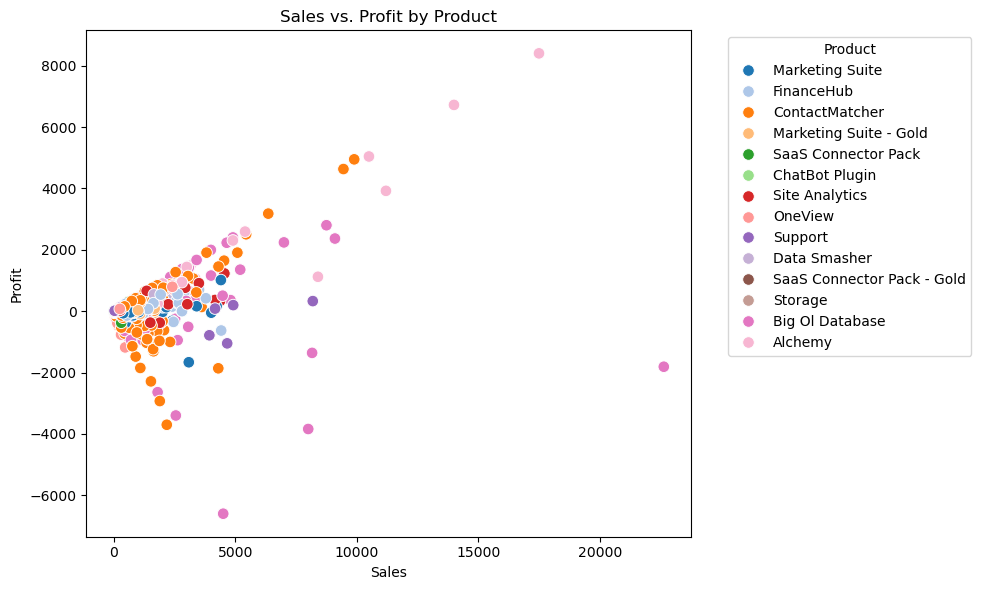

In [ ]:
# Scatterplot Sales vs Profit by Product (per transaksi)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Sales", y="Profit", hue="Product", palette="tab20", s=70)
plt.title("Sales vs. Profit by Product")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.legend(title="Product", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Insight:

- Produk dengan profit tinggi tidak selalu memiliki sales tertinggi. Contohnya, Alchemy dan Site Analytics menonjol dengan profit besar meski sales tidak paling tinggi.
- Ada produk dengan sales besar namun profit sangat kecil atau bahkan negatif, seperti Marketing Suite (profit negatif meski sales cukup tinggi) dan Big Ol Database.
- Produk dengan margin tinggi cenderung berada di kuadran kanan atas (sales & profit tinggi), sedangkan produk dengan diskon tinggi atau margin rendah cenderung menyebar di bawah atau kiri.
- Outlier profit negatif menandakan adanya produk yang berisiko merugikan jika tidak dikelola dengan baik (perlu evaluasi pricing/diskon).
- Secara umum, distribusi produk cukup tersebar, menandakan variasi performa antar produk yang signifikan, penting untuk strategi portofolio produk dan promosi yang berbeda.

Kemudian, kita lihat profit setiap produk dan hubungannya dengan pemberian diskon

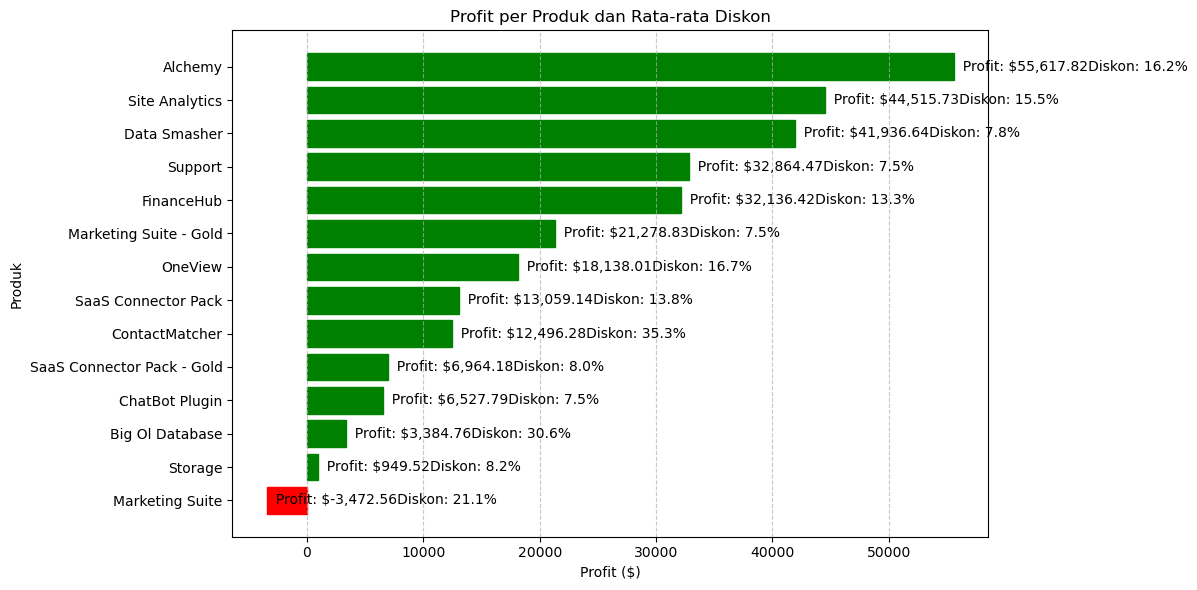

In [ ]:
# Menghitung total profit dan rata-rata diskon per produk
product_metrics = df.groupby('Product').agg({
    'Profit': 'sum',
    'Discount': 'mean'
}).reset_index()

# Mengurutkan berdasarkan profit
product_metrics = product_metrics.sort_values('Profit', ascending=True)

# Membuat plot
plt.figure(figsize=(12, 6))
bars = plt.barh(product_metrics['Product'], product_metrics['Profit'])

# Memberikan warna berbeda untuk profit positif dan negatif
for i, bar in enumerate(bars):
    if product_metrics['Profit'].iloc[i] < 0:
        bar.set_color('red')
    else:
        bar.set_color('green')

# Menambahkan nilai profit dan diskon di sebelah bar
for i, (profit, discount) in enumerate(zip(product_metrics['Profit'], product_metrics['Discount'])):
    plt.text(profit, i, f'  Profit: ${profit:,.2f}\
Diskon: {discount:.1%}', va='center')

plt.title('Profit per Produk dan Rata-rata Diskon')
plt.xlabel('Profit ($)')
plt.ylabel('Produk')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Dari grafik tersebut diperoleh informasi:
- Produk dengan profit tertinggi adalah Alchemy, Site Analytics, dan Data Smasher. Produk-produk ini memberikan kontribusi terbesar terhadap profit perusahaan.
- Marketing Suite adalah satu-satunya produk dengan total profit negatif, menandakan adanya masalah pricing, diskon terlalu besar, atau biaya tinggi pada produk ini.
- Produk dengan profit rendah (Big Ol Database, ChatBot Plugin, ContactMatcher) umumnya memiliki rata-rata diskon lebih tinggi, sehingga margin keuntungannya tipis.
- Produk dengan profit tinggi cenderung memiliki diskon rata-rata yang lebih rendah, sehingga margin tetap terjaga.
- Perlu evaluasi strategi diskon dan pricing pada produk dengan profit rendah atau negatif agar tidak membebani profitabilitas perusahaan secara keseluruhan.

Selanjutnya, coba kita lihat profit marginnya

In [ ]:
# Hitung Profit Margin
df['Profit_Margin_Pct'] = df['Profit_Margin'] * 100

# Agregasi data per produk
produk_agg = df.groupby('Product').agg(
    Total_Sales=('Sales', 'sum'),
    Total_Profit=('Profit', 'sum'),
    Median_Profit_Margin=('Profit_Margin_Pct', 'median'),
    Mean_Profit_Margin=('Profit_Margin_Pct', 'mean'),
    Median_Discount=('Discount', 'median'),
    Mean_Discount=('Discount', 'mean'),
    Count=('Product', 'count')
).reset_index()

# Tampilkan seluruh produk beserta metrik agregatnya
display(produk_agg[['Product', 'Total_Sales', 'Total_Profit', 'Median_Profit_Margin', 'Mean_Profit_Margin', 'Median_Discount', 'Mean_Discount', 'Count']])

,Product,Total_Sales,Total_Profit,Median_Profit_Margin,Mean_Profit_Margin,Median_Discount,Mean_Discount,Count
0,Alchemy,149528.0300,55617.8249,33.750000,31.719363,0.2,0.161765,68
1,Big Ol Database,189238.6310,3384.7569,11.250000,-7.202622,0.2,0.306087,115
2,ChatBot Plugin,27118.7920,6527.7870,27.000000,25.164573,0.0,0.074874,796
3,ContactMatcher,410378.2650,12496.2822,25.000000,-19.061243,0.2,0.353067,1842
4,Data Smasher,167380.3180,41936.6357,21.250000,21.820968,0.0,0.078452,775
5,FinanceHub,340935.4150,32136.4203,17.777778,18.703728,0.2,0.132518,981
6,Marketing Suite,114879.9963,-3472.5560,1.176471,-12.664007,0.2,0.211140,228
7,Marketing Suite - Gold,223843.6080,21278.8264,8.750000,8.911348,0.0,0.074704,846
8,OneView,107532.1610,18138.0054,26.000000,-15.686934,0.0,0.166524,466
9,SaaS Connector Pack,91705.1640,13059.1436,27.500000,13.706635,0.0,0.138349,957


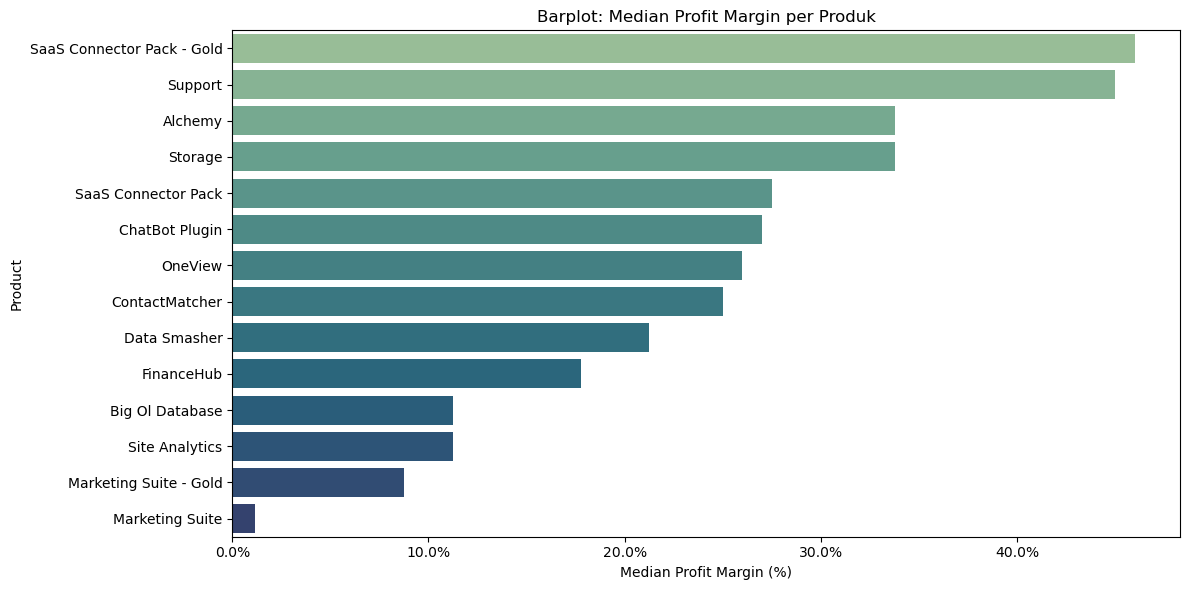

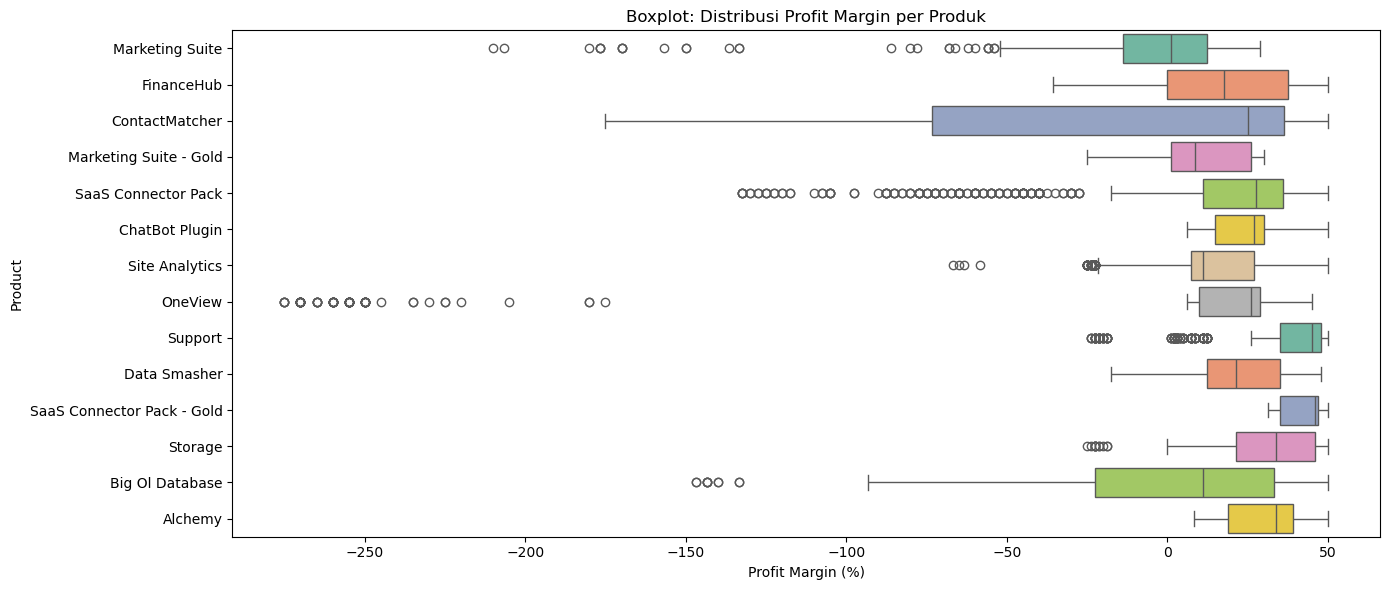

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=produk_agg.sort_values('Median_Profit_Margin', ascending=False),
            x='Median_Profit_Margin', y='Product', palette='crest')
plt.title('Barplot: Median Profit Margin per Produk')
plt.xlabel('Median Profit Margin (%)')
plt.ylabel('Product')
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter())
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Profit_Margin_Pct', y='Product', orient='h', palette='Set2')
plt.title('Boxplot: Distribusi Profit Margin per Produk')
plt.xlabel('Profit Margin (%)')
plt.tight_layout()
plt.show()

Insight Analisis Margin Keuntungan Produk:

1. Produk Prioritas Pengembangan Bisnis:
    - Produk dengan **margin keuntungan tinggi** (misal: Alchemy, SaaS Connector Pack - Gold, Support, Data Smasher) memiliki median profit margin di atas 25% dan profit absolut besar. Produk-produk ini layak menjadi fokus utama untuk pengembangan bisnis, upselling, dan promosi karena terbukti efisien menghasilkan profit.
    - Produk seperti **Site Analytics** dan **ChatBot Plugin** juga menunjukkan margin yang sehat dan volume penjualan yang baik, sehingga dapat diprioritaskan untuk ekspansi pasar.

2. Produk dengan Margin Rendah atau Negatif:
    - Produk seperti **Marketing Suite** dan **Big Ol Database** memiliki **profit margin rendah bahkan negatif** meski volume penjualan cukup besar. Hal ini menandakan adanya masalah pada pricing, biaya, atau strategi diskon yang terlalu agresif.
    - **ContactMatcher** juga memiliki margin rendah, meski profit absolut masih positif. Perlu diwaspadai agar tidak menjadi beban profitabilitas di masa depan.

## **3. Efektivitas Diskon terhadap Penjualan dan Profit**

Dalam menganalisis efektivitas diskon, pertama akan dilihat distrubusi diskon dan melihat hubungan dengan profit dan sales. Kemudian, akan diidentifikasi ambang diskon kritis dan uji statistik efektivitas diskon.

Kita akan memvisualisasikan distribusi nilai diskon pada seluruh transaksi menggunakan histogram dan boxplot untuk memahami pola pemberian diskon.

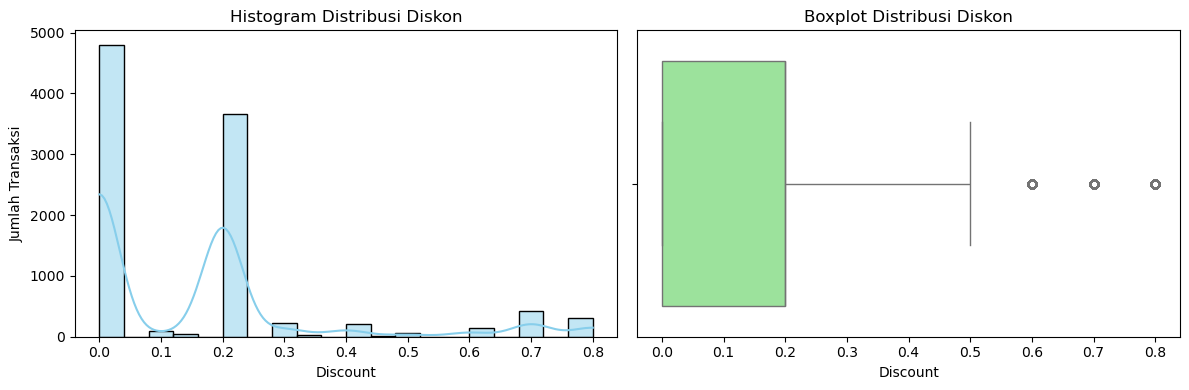

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['Discount'], bins=20, kde=True, color='skyblue')
plt.title('Histogram Distribusi Diskon')
plt.xlabel('Discount')
plt.ylabel('Jumlah Transaksi')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Discount'], color='lightgreen')
plt.title('Boxplot Distribusi Diskon')
plt.xlabel('Discount')
plt.tight_layout()
plt.show()

Dari histogram dan boxplot di atas terlihat bahwa:

1. Sebagian besar transaksi terjadi pada diskon 0% (nilai 0.0). Ini menunjukkan bahwa banyak pelanggan membeli produk tanpa diskon.
2. Ada lonjakan transaksi pada diskon 20% (nilai 0.2), yang mungkin mencerminkan strategi promosi tertentu atau diskon yang sering diberikan untuk produk tertentu.
3. Diskon di atas 20% (misalnya 30%, 40%, dst.) memiliki jumlah transaksi yang lebih rendah, menunjukkan bahwa diskon besar tidak terlalu sering diberikan atau kurang populer.

Selanjutnya, akan dilihat hubungan diskon dengan profit dan sales.

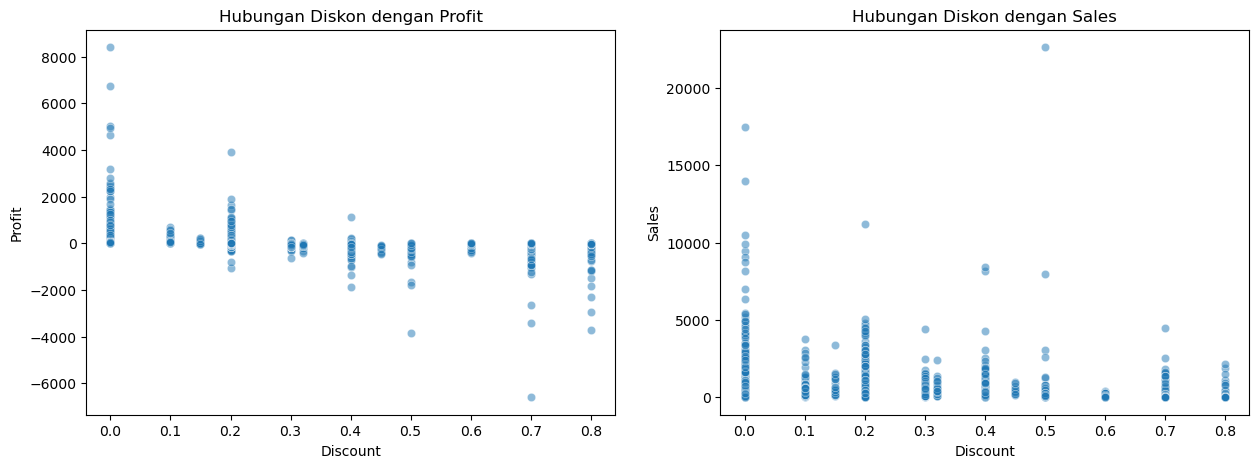

Korelasi Spearman Diskon-Profit: -0.543 (p-value: 0.0000)
Korelasi Spearman Diskon-Sales: -0.057 (p-value: 0.0000)


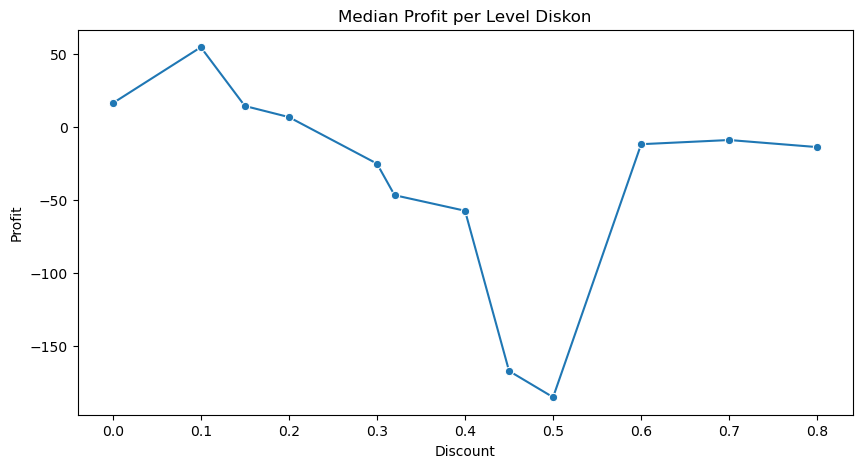

In [ ]:
plt.figure(figsize=(15, 5))

# Scatter plot diskon vs profit
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Discount', y='Profit', alpha=0.5)
plt.title('Hubungan Diskon dengan Profit')

# Scatter plot diskon vs sales
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Discount', y='Sales', alpha=0.5)
plt.title('Hubungan Diskon dengan Sales')
plt.show()

# Menghitung korelasi Spearman
corr_profit, pval_profit = spearmanr(df['Discount'], df['Profit'])
corr_sales, pval_sales = spearmanr(df['Discount'], df['Sales'])

print(f"Korelasi Spearman Diskon-Profit: {corr_profit:.3f} (p-value: {pval_profit:.4f})")
print(f"Korelasi Spearman Diskon-Sales: {corr_sales:.3f} (p-value: {pval_sales:.4f})")

# Line plot median profit per diskon
plt.figure(figsize=(10, 5))
sns.lineplot(data=df.groupby('Discount')['Profit'].median().reset_index(), 
             x='Discount', y='Profit', marker='o')
plt.title('Median Profit per Level Diskon')
plt.show()

Korelasi Spearman menunjukkan hubungan negatif antara diskon dan profit sebesar -0.543 (p < 0.001), yang berarti semakin besar diskon, profit cenderung menurun tajam. Sementara itu, hubungan diskon dengan sales justru sangat lemah (-0.057), menandakan bahwa diskon besar tidak efektif dalam mendorong penjualan. Median profit juga menunjukkan tren menurun tajam **saat diskon melebihi 20%**.

Diskon besar-besaran berisiko merugikan tanpa memberi efek signifikan pada penjualan. Perusahaan perlu lebih selektif dalam strategi pemberian diskon.

Dari perhitungan profit per level diskon, diketahui ternyata tren profit menurun tajam saat diskon melebihi 20%. Selanjutnya, akan diidentifikasi **ambang batas diskon** tersebut agar profit yang diperoleh perusahaan diharapkan dapat optimal

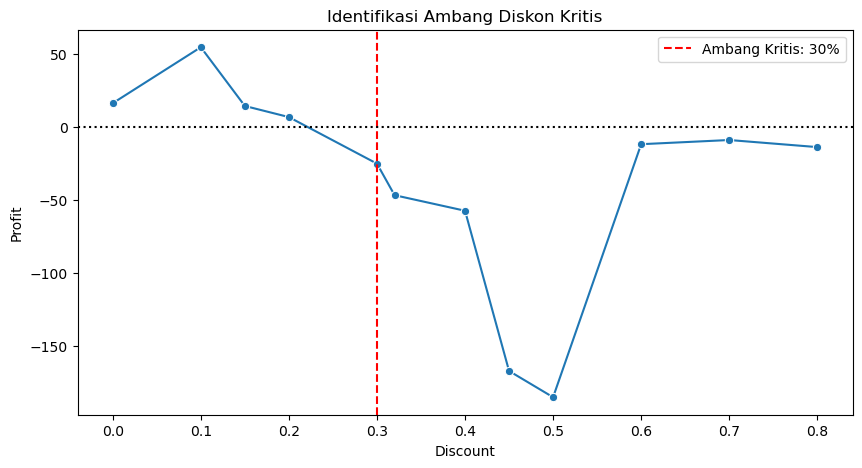

Ambang diskon kritis: 30% (profit mulai <= 0)


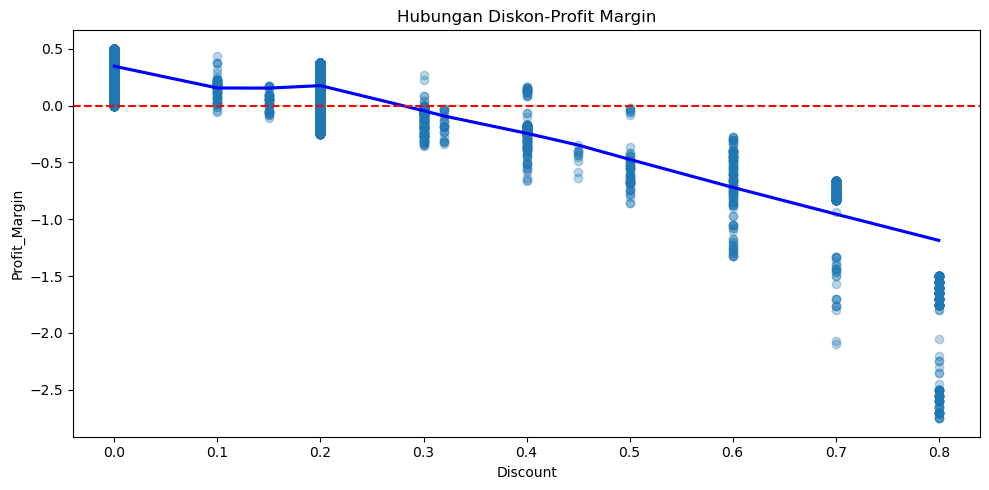

In [ ]:
plt.figure(figsize=(10, 5))
profit_median = df.groupby('Discount')['Profit'].median().reset_index()
sns.lineplot(data=profit_median, x='Discount', y='Profit', marker='o')

critical_point = profit_median[profit_median['Profit'] <= 0]['Discount'].min()
plt.axvline(x=critical_point, color='red', linestyle='--', label=f'Ambang Kritis: {critical_point:.0%}')
plt.axhline(y=0, color='black', linestyle=':')
plt.title('Identifikasi Ambang Diskon Kritis')
plt.legend()
plt.show()

print(f"Ambang diskon kritis: {critical_point:.0%} (profit mulai <= 0)")

df['Profit_Margin'] = df['Profit'] / df['Sales']
df['Profit_Per_Unit'] = df['Profit'] / df['Quantity']

plt.figure(figsize=(10, 5))
sns.regplot(data=df, x='Discount', y='Profit_Margin', lowess=True,
           scatter_kws={'alpha':0.3}, line_kws={'color':'blue'})
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Hubungan Diskon-Profit Margin')

plt.tight_layout()
plt.show()

Grafik di atas menunjukkan bahwa profit mulai menjadi negatif saat diskon mencapai **30%** (ambang kritis). Artinya, pemberian diskon di atas 30% justru menyebabkan perusahaan merugi, tanpa adanya peningkatan signifikan pada volume penjualan. 

Oleh karena itu, strategi diskon sebaiknya dibatasi maksimal 20–30% agar profitabilitas tetap terjaga. Diskon besar (>30%) hanya layak diberikan untuk kasus khusus yang benar-benar strategis, bukan sebagai kebijakan umum.

**Uji statistik efektivitas** diskon menggunakan Mann-Whitney:

H0 --> Tidak ada perbedaan signifikan median profit antara kelompok diskon <20% dan ≥20%. Profit pada kedua kelompok sama

Ha --> Median profit pada kelompok diskon <20% lebih tinggi secara signifikan dibanding ≥20%. Profit lebih baik di diskon rendah

Jika p-value < 0.05:
Tolak H₀ → Diskon <20% secara signifikan lebih menguntungkan.

Jika p-value ≥ 0.05:
Tidak cukup bukti untuk menyatakan ada perbedaan signifikan.

Digunakan Mann-Whitney U Test karena karakteristik data yang tidak memenuhi syarat uji parametrik atau data tidak berdistribusi normal, membandingkan dua kelompok independen (kelompok diskon rendah (<20%) vs tinggi (≥20%) saling independen), alternatif non-parametrik untuk t-test.


In [ ]:
# Bagi data menjadi dua kelompok
low_discount = df[df['Discount'] < 0.2]['Profit']
high_discount = df[df['Discount'] >= 0.2]['Profit']

# Uji Mann-Whitney dengan Hₐ: low_discount > high_discount
stat, p = mannwhitneyu(low_discount, high_discount, alternative='greater')
print(f"Hasil Uji:\nStatistik = {stat:.2f}, p-value = {p:.4f}")

if p < 0.05:
    print("Tolak H₀: Profit signifikan lebih tinggi pada diskon <20%")
else:
    print("Gagal tolak H₀: Tidak ada perbedaan signifikan")

Hasil Uji:
Statistik = 18912988.00, p-value = 0.0000
Tolak H₀: Profit signifikan lebih tinggi pada diskon <20%


Hasil uji Mann-Whitney menunjukkan p-value < 0.05, sehingga H₀ ditolak. Artinya, terdapat perbedaan signifikan pada profit median antara transaksi dengan diskon <20% dan ≥20%. Profit median pada transaksi dengan diskon <20% secara signifikan lebih tinggi dibandingkan transaksi dengan diskon ≥20%. Hal ini membuktikan bahwa pemberian diskon besar (≥20%) justru menurunkan profit secara statistik. Oleh karena itu, perusahaan sebaiknya membatasi pemberian diskon besar agar profitabilitas tetap optimal.


## **4. Identifikasi Pelanggan Paling Bernilai**

Pada bagian ini, kita akan identifikasi pelanggan paling bernilai (utama) dengan kontribusi profit terbesar dan perilaku pembelian yang menguntungkan.

Pertama, kita akan melihat gambaran besar sebaran profit & sales tiap pelanggan untuk mendapatkan informasi apakah semua pelanggan yang besar secara sales juga besar secara profit.

In [50]:
customer_metrics = df.groupby('Customer').agg({
    'Profit': 'sum',
    'Sales': 'sum',
    'Order ID': 'count'
}).reset_index()

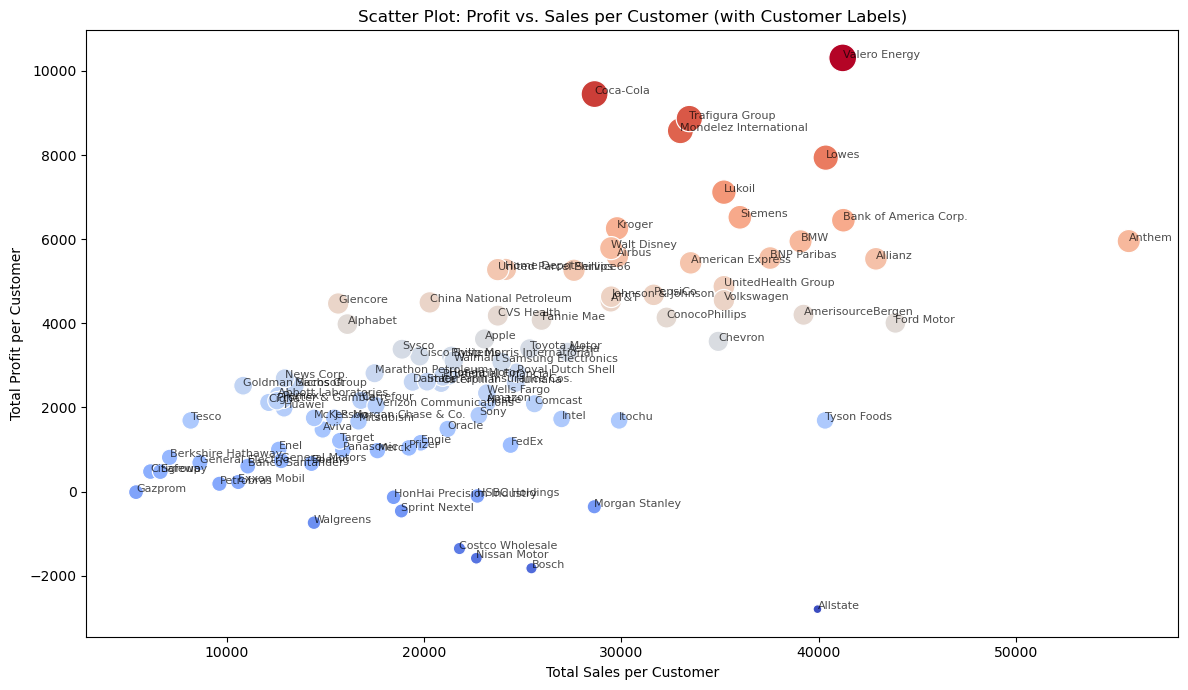

In [51]:
# 1. Scatter plot profit vs sales per customer
plt.figure(figsize=(12, 7))
ax = sns.scatterplot(data=customer_metrics, x='Sales', y='Profit', hue='Profit', palette='coolwarm', size='Profit', sizes=(40, 400), legend=False)

# Tambahkan label nama customer pada setiap titik
for i, row in customer_metrics.iterrows():
    plt.text(row['Sales'], row['Profit'], str(row['Customer']), fontsize=8, alpha=0.7)

plt.xlabel('Total Sales per Customer')
plt.ylabel('Total Profit per Customer')
plt.title('Scatter Plot: Profit vs. Sales per Customer (with Customer Labels)')
plt.tight_layout()
plt.show()

Dari scatter plot tersebut diperoleh informasi bahwa tidak semua pelanggan dengan sales besar akan memberikan profit yang besar juga. Bahkan, ada beberapa pelanggan dengan sales besar menghasilkan profit yang minus. 

Titik di kanan atas adalah pelanggan dengan penjualan dan profit tertinggi. Mereka dapat dijadikan target utama untuk retensi dan pengembangan hubungan. Siapa sajakah mereka?


,Customer,Profit,Sales,Order ID
92,Valero Energy,10308.6297,41220.4188,105
28,Coca-Cola,9449.0246,28643.8040,81
88,Trafigura Group,8867.8252,33447.1270,103
62,Mondelez International,8577.6524,32993.0458,143
55,Lowes,7937.4915,40360.1630,110
56,Lukoil,7117.0922,35199.1830,116
80,Siemens,6519.5105,36008.3686,170
16,Bank of America Corp.,6449.8554,41255.9471,132
54,Kroger,6256.1005,29783.4590,135
10,Anthem,5953.2038,55719.2100,134


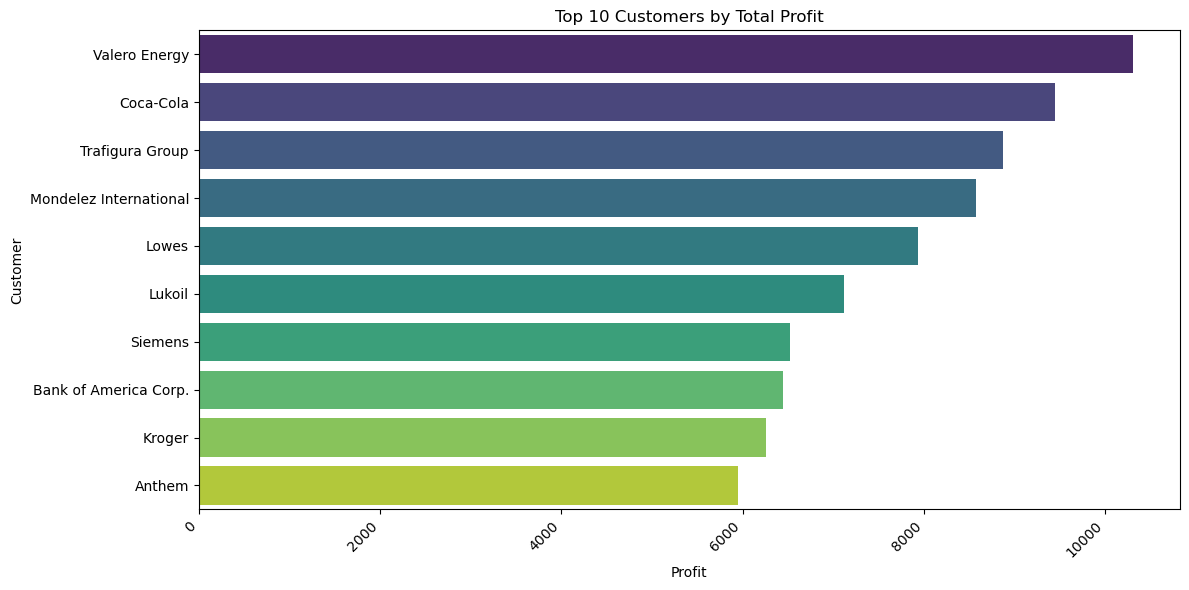

In [140]:
# Ambil 10 customer teratas berdasarkan total Profit dari scatter plot di atas
top_10_customers = customer_metrics.sort_values('Profit', ascending=False).head(10)
display(top_10_customers)

plt.figure(figsize=(12, 6))
sns.barplot(data=customer_metrics_sorted.head(10), 
            x='Profit', 
            y='Customer',
            palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Customers by Total Profit')
plt.tight_layout()
plt.show()

Apakah Top 10 Pelanggan ini merupakan retained customer? kita akan mengecek jumlah order mereka dan rata-rata order tiap pelanggan

In [141]:
print(f"Rata-rata total order per pelanggan: {avg_total_order:.2f}")

# Ambil daftar pelanggan bernilai tinggi (misal top 10)
top_customers_list = top_10_customers['Customer']

# Hitung jumlah order unik per pelanggan bernilai tinggi
repeat_orders = df[df['Customer'].isin(top_customers_list)].groupby('Customer')['Order ID'].nunique().reset_index()
repeat_orders.columns = ['Customer', 'Total Orders']

# Gabungkan dengan data profit/sales pelanggan bernilai tinggi
repeat_orders = repeat_orders.merge(top_10_customers[['Customer', 'Profit', 'Sales']], on='Customer')
display(repeat_orders.sort_values('Total Orders', ascending=False))
avg_total_order = df.groupby('Customer')['Order ID'].nunique().mean()


Rata-rata total order per pelanggan: 50.60


,Customer,Total Orders,Profit,Sales
7,Siemens,86,6519.5105,36008.3686
3,Kroger,76,6256.1005,29783.4590
1,Bank of America Corp.,65,6449.8554,41255.9471
6,Mondelez International,61,8577.6524,32993.0458
0,Anthem,58,5953.2038,55719.2100
4,Lowes,58,7937.4915,40360.1630
9,Valero Energy,58,10308.6297,41220.4188
5,Lukoil,53,7117.0922,35199.1830
8,Trafigura Group,52,8867.8252,33447.1270
2,Coca-Cola,38,9449.0246,28643.8040


Dari tabel di atas, terlihat bahwa sebagian besar dari 10 pelanggan teratas melakukan pembelian berulang (jumlah order > 1) dan di atas rata-rata order tiap pelanggan. Ini menunjukkan mayoritas top 10 customer adalah retained customer, bukan hanya pembeli satu kali. Artinya, pelanggan paling bernilai cenderung loyal dan berkontribusi signifikan terhadap profit perusahaan.

Berapa % total profit yang diberikan dari 10 pelanggan teratas ini?

In [122]:
# Hitung total profit dari 10 pelanggan teratas
top_10_profit = top_10_customers['Profit'].sum()
# Hitung persentase kontribusi profit 10 pelanggan teratas terhadap total profit
top_10_profit_pct = 100 * top_10_profit / total_profit

print(f"Total profit 10 pelanggan teratas: {top_10_profit:,.2f}")
print(f"Kontribusi 10 pelanggan teratas terhadap total profit: {top_10_profit_pct:.2f}%")

Total profit 10 pelanggan teratas: 77,436.39
Kontribusi 10 pelanggan teratas terhadap total profit: 27.04%


In [125]:
# Cek apakah 20% pelanggan memberikan 80% profit --> prinsip Pareto
# Hitung total profit dari 20% pelanggan teratas
total_customers = 99
top_20pct_count = int(np.ceil(0.2 * total_customers))
top_20pct_profit = top_20pct['Profit'].sum()
total_profit = customer_metrics_sorted['Profit'].sum()
top_20pct_profit_pct = 100 * top_20pct_profit / total_profit

print(f"Jumlah pelanggan 20% teratas: {top_20pct_count}")
print(f"Kontribusi profit 20% pelanggan teratas: {top_20pct_profit_pct:.2f}%")

if top_20pct_profit_pct >= 80:
    print("20% pelanggan sudah memberikan >=80% profit (prinsip Pareto berlaku).")
else:
    print("20% pelanggan BELUM memberikan 80% profit.")

Jumlah pelanggan 20% teratas: 20
Kontribusi profit 20% pelanggan teratas: 79.49%
20% pelanggan BELUM memberikan 80% profit.


**Insight :**
Prinsip Pareto (80/20 Rule): Ada 99 pelanggan unik di dataset ini, 20% pelanggan (20 pelanggan) sudah menyumbang hampir 80% profit (79,49%). Ini artinya, fokus retensi dan layanan sebaiknya diarahkan ke pelanggan-pelanggan ini.

Selanjutnya, kita akan melihat segmen mana yang berkontribusi paling besar terhadap sales dan profit

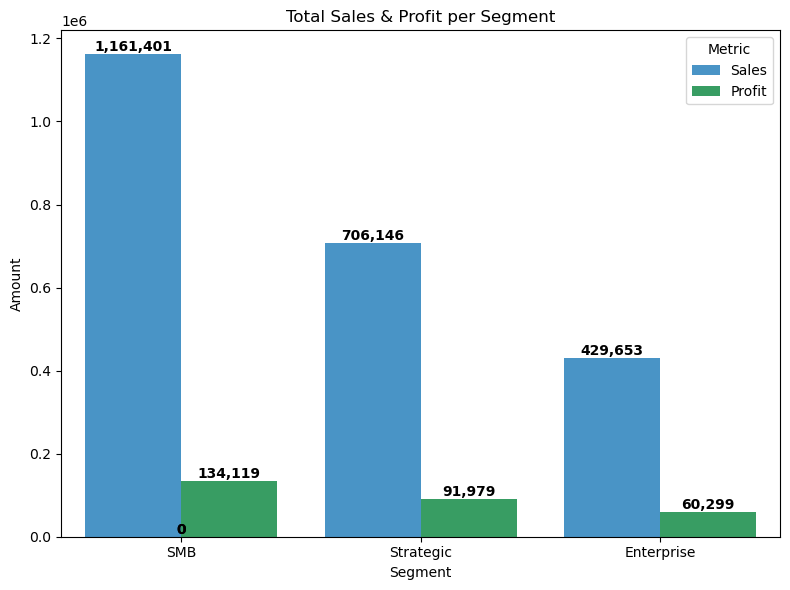

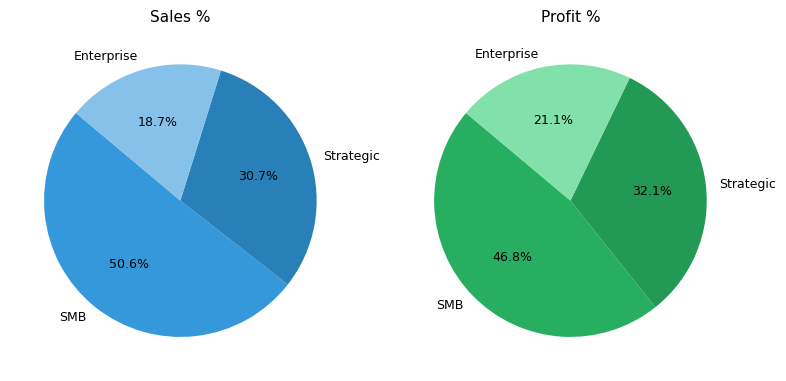

In [142]:
segmen_plot = segmen_summary[['Sales', 'Profit']].reset_index().melt(id_vars='Segment', var_name='Metric', value_name='Amount')

plt.figure(figsize=(8, 6))
# Grouped barplot Sales & Profit per Segment
ax = sns.barplot(data=segmen_plot, x='Segment', y='Amount', hue='Metric', palette=['#3498db', '#27ae60'])
plt.title('Total Sales & Profit per Segment')
plt.ylabel('Amount')
plt.xlabel('Segment')
plt.legend(title='Metric')


for p in ax.patches:
    height = p.get_height()
    if not np.isnan(height):
        ax.annotate(f'{height:,.0f}', 
                    (p.get_x() + p.get_width() / 2, height), 
                    ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# Pie chart Sales
sales_pct = segmen_summary['Sales_pct']
labels = segmen_summary.index
ax1.pie(sales_pct, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#3498db', '#2980b9', '#85c1e9'], textprops={'fontsize': 9})
ax1.set_title('Sales %', fontsize=11)

# Pie chart Profit
profit_pct = segmen_summary['Profit_pct']
ax2.pie(profit_pct, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#27ae60', '#229954', '#82e0aa'], textprops={'fontsize': 9})
ax2.set_title('Profit %', fontsize=11)

plt.tight_layout()
plt.show()


Terlihat bahwa: 
- SMB (Small and Medium Business) adalah kontributor terbesar untuk sales (50.6%) dan profit (46.8%), menjadi tulang punggung bisnis.
- Margin profit di segmen Strategic dan Enterprise lebih tinggi, meski volume lebih kecil.
- Fokus strategi: tingkatkan margin SMB dan maksimalkan loyalitas di Strategic/Enterprise.


Selanjutnya, kita akan mengecek Top 10 pelanggan tadi berada di segmen mana

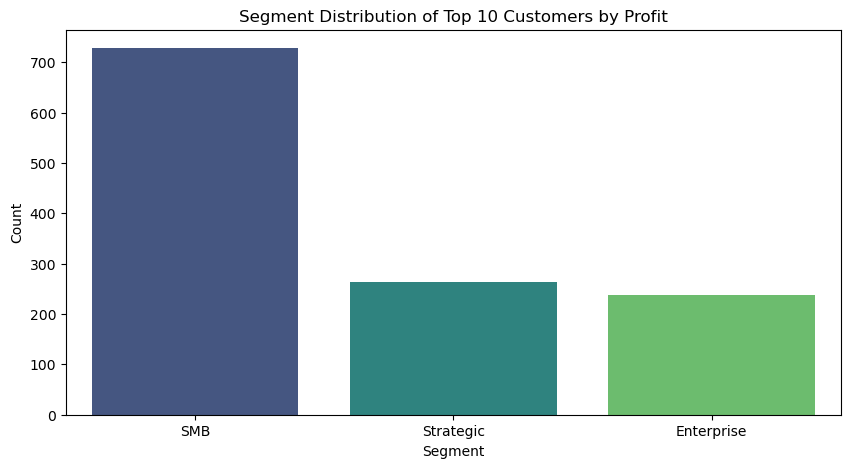

Top 10 Customers dengan Segment:
                    Customer     Segment
2266                  Anthem  Enterprise
456                   Anthem         SMB
885                   Anthem   Strategic
47     Bank of America Corp.         SMB
2020   Bank of America Corp.  Enterprise
414    Bank of America Corp.   Strategic
2072               Coca-Cola   Strategic
519                Coca-Cola         SMB
436                   Kroger  Enterprise
161                   Kroger         SMB
924                   Kroger   Strategic
429                    Lowes  Enterprise
274                    Lowes   Strategic
264                    Lowes         SMB
1071                  Lukoil  Enterprise
1416                  Lukoil   Strategic
506                   Lukoil         SMB
2605  Mondelez International   Strategic
62    Mondelez International         SMB
289                  Siemens  Enterprise
42                   Siemens   Strategic
25                   Siemens         SMB
304          Trafigura G

In [143]:
# Mengambil top 10 customer berdasarkan profit
top_10_customers = customer_metrics_sorted.head(10)

# Visualisasi segment distribution untuk top 10 customers
plt.figure(figsize=(10, 5))
segment_counts = df[df['Customer'].isin(top_10_customers['Customer'])]['Segment'].value_counts()
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='viridis')
plt.title('Segment Distribution of Top 10 Customers by Profit')
plt.ylabel('Count')
plt.show()

# Print detail top 10 customers dengan segment
print("\
Top 10 Customers dengan Segment:")
top_10_detail = df[df['Customer'].isin(top_10_customers['Customer'])][['Customer', 'Segment']].drop_duplicates()
print(top_10_detail.sort_values('Customer'))

Terlihat bahwa sebagian besar top customer tersebar di ketiga segmen: Enterprise, SMB, dan Strategic. Ini menandakan bahwa **pelanggan bernilai tinggi tidak hanya berasal dari satu segmen saja**, sehingga strategi retensi dan pengembangan bisa disesuaikan untuk tiap segmen utama.


Selanjutnya, mari kita lihat heatmap profitabilitas berdasarkan segmentasi pelanggan (misal: Segment dan Industry) untuk mengetahui segmen mana yang paling menguntungkan.

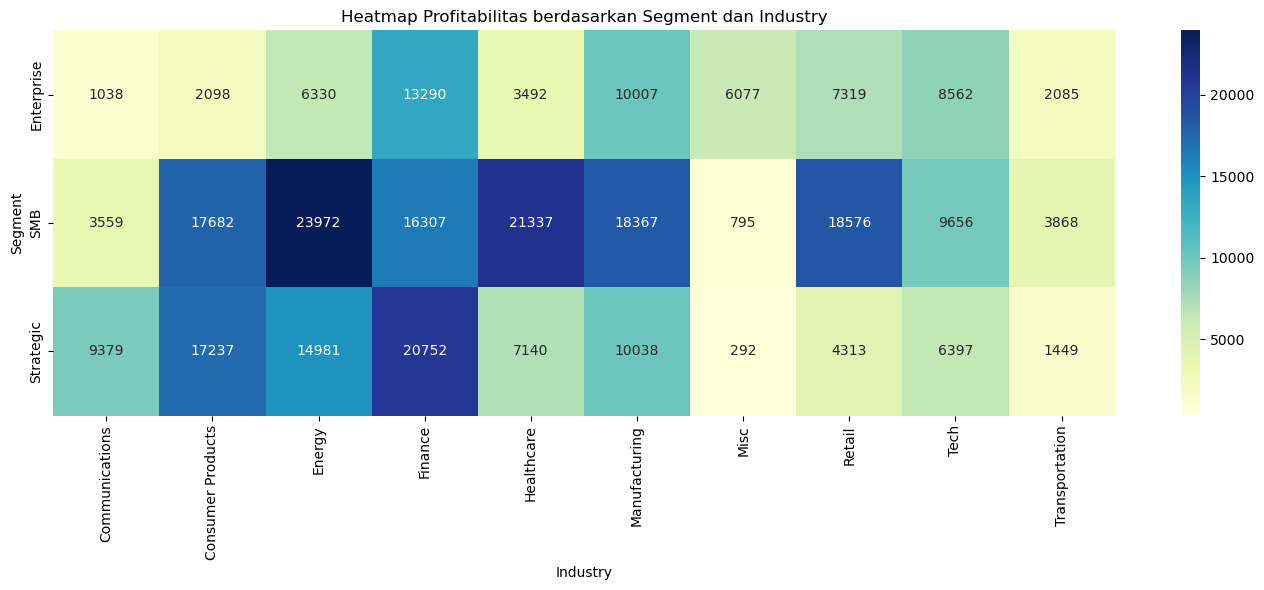

In [94]:
# Heatmap: Profitability by Segment and Industry
segment_industry_profit = df.groupby(['Segment', 'Industry'])['Profit'].sum().unstack().fillna(0)
plt.figure(figsize=(14, 6))
sns.heatmap(segment_industry_profit, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Heatmap Profitabilitas berdasarkan Segment dan Industry')
plt.ylabel('Segment')
plt.xlabel('Industry')
plt.tight_layout()
plt.show()

Insight:
- SMB unggul di hampir semua industri, terutama Finance, Manufacturing, dan Retail.
- Strategic kuat di Consumer Products, Communications, dan Finance.
- Enterprise paling menguntungkan di Tech dan Manufacturing.
- Finance dan Manufacturing adalah industri paling profitable lintas semua segmen.
- Ada peluang penguatan di industri dengan profit rendah (Misc, Transportation) untuk segmen tertentu.

Kemudian, kita akan analisis profit berdasarkan region untuk melihat apakah ada wilayah tertentu yang lebih menguntungkan dan bisa menjadi prioritas retensi pelanggan.

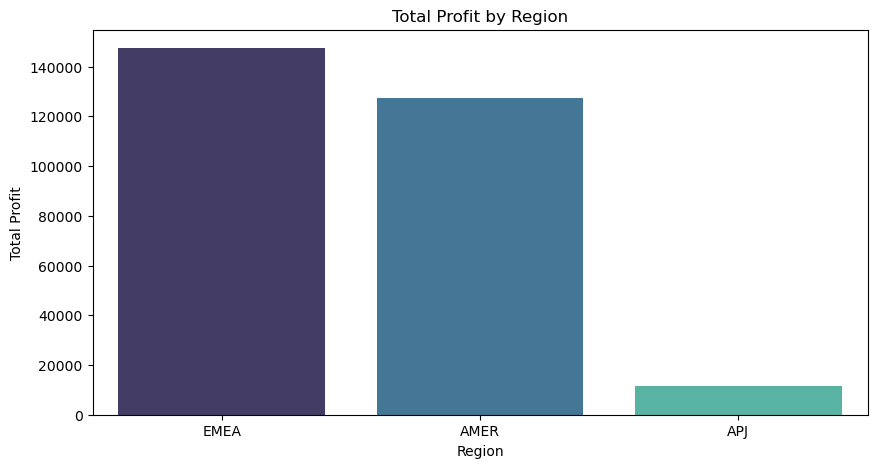

Region Metrics:
           Profit                    Sales
              sum   mean count         sum
Region                                    
AMER    127426.99  34.77  3665   837849.60
APJ      11513.99   5.46  2110   415464.24
EMEA    147456.05  34.95  4219  1043887.02


In [95]:
# Analisis Profit berdasarkan Region
plt.figure(figsize=(10, 5))
region_profit = df.groupby('Region')['Profit'].sum().sort_values(ascending=False)
sns.barplot(x=region_profit.index, y=region_profit.values, palette='mako')
plt.title('Total Profit by Region')
plt.ylabel('Total Profit')
plt.show()

# Print region metrics
region_metrics = df.groupby('Region').agg({
    'Profit': ['sum', 'mean', 'count'],
    'Sales': 'sum'
}).round(2)
print("\
Region Metrics:")
print(region_metrics)

Region:

EMEA (Europe, Middle East, and Africa) dan AMER (Americas ) menghasilkan profit terbesar (147K dan 127K)
APJ  (Asia Pacific & Japan)  memiliki profit terendah dengan rata-rata profit per transaksi hanya 5.46

Pembahasan:

- Distribusi Profit & Sales: Tidak semua pelanggan dengan sales besar menghasilkan profit besar; beberapa bahkan merugi karena diskon tinggi.
- Kontribusi Pelanggan Utama: 10 pelanggan teratas menyumbang ~27% total profit, dan 20% pelanggan menyumbang hampir 80% profit (prinsip Pareto berlaku).
- Sebaran Segmen: Pelanggan bernilai tinggi tersebar di SMB, Strategic, dan Enterprise. SMB mendominasi volume, namun margin profit tinggi juga ada di Strategic/Enterprise.
- Industri & Wilayah: Finance dan Manufacturing paling menguntungkan; EMEA dan AMER adalah wilayah dengan profit terbesar.
- Karakteristik: Mayoritas pelanggan bernilai tinggi adalah pelanggan loyal dengan pembelian berulang.

# **IV. Kesimpulan dan Rekomendasi**

## **1. Kesimpulan**

1. **Tren Penjualan dan Profit**
- Penjualan dan profit perusahaan menunjukkan tren pertumbuhan yang positif dari tahun ke tahun, dengan lonjakan signifikan pada tahun 2023.
- Puncak penjualan dan profit biasanya terjadi di akhir tahun (Q4), mengindikasikan adanya pola musiman yang kuat, kemungkinan dipengaruhi oleh strategi promosi atau perilaku belanja akhir tahun.
- Meskipun sebagian besar bulan menghasilkan profit positif, terdapat beberapa periode rugi (profit negatif), terutama di awal tahun. Namun, proporsi transaksi untung tetap stabil di kisaran 80% setiap tahun.
- Lonjakan penjualan tidak selalu diikuti oleh kenaikan profit yang sebanding, menandakan pentingnya menjaga margin keuntungan di tengah strategi peningkatan volume penjualan.

2. **Analisis Margin Profit Produk**
- Produk dengan margin keuntungan tinggi seperti Alchemy, SaaS Connector Pack - Gold, Support, dan Data Smasher terbukti sangat efisien dalam menghasilkan profit dan layak menjadi prioritas utama dalam strategi bisnis.
- Produk seperti Marketing Suite dan Big Ol Database memiliki profit margin rendah atau bahkan negatif, menandakan adanya masalah pada pricing, biaya, atau strategi diskon yang terlalu agresif.
- Terdapat variasi signifikan antar produk dalam hal profitabilitas, sehingga strategi yang seragam untuk semua produk kurang efektif.

3. **Efektivitas Diskon**
- Mayoritas transaksi terjadi tanpa diskon atau dengan diskon ≤20%. Diskon besar (>20%) relatif jarang diberikan.
- Korelasi negatif yang kuat antara diskon dan profit (Spearman -0.54) menunjukkan bahwa semakin besar diskon, profit cenderung menurun tajam.
- Tidak ditemukan hubungan signifikan antara diskon dan peningkatan sales (korelasi sangat lemah).
- Profit median mulai negatif saat diskon mencapai 30% (ambang kritis). Diskon di atas 30% justru menyebabkan kerugian.
- Uji statistik Mann-Whitney membuktikan profit transaksi dengan diskon <20% secara signifikan lebih tinggi dibanding diskon ≥20%.

4. **Pelanggan Paling Bernilai**
- Distribusi Profit: Tidak semua pelanggan dengan nilai penjualan (sales) besar memberikan profit besar; beberapa bahkan merugi akibat diskon tinggi.
- Kontribusi Pelanggan Utama: 10 pelanggan teratas menyumbang sekitar 27% total profit, dan 20% pelanggan menyumbang hampir 80% profit (prinsip Pareto berlaku).
- Karakteristik Pelanggan Bernilai Tinggi: Mayoritas pelanggan paling bernilai adalah pelanggan loyal dengan pembelian berulang dan berasal dari berbagai segmen (SMB, Strategic, Enterprise) serta industri utama (Finance, Manufacturing).
- Wilayah dan Industri: EMEA dan AMER merupakan wilayah dengan profit terbesar, sedangkan industri Finance dan Manufacturing paling menguntungkan.

## **2. Rekomendasi**

1. **Tren Penjualan dan Profit**
- Fokuskan strategi promosi dan penjualan pada periode akhir tahun untuk memaksimalkan potensi lonjakan penjualan dan profit.
- Lakukan evaluasi terhadap periode rugi di awal tahun, misalnya dengan mengurangi diskon besar atau mengoptimalkan biaya operasional pada periode tersebut.
- Jaga keseimbangan antara pertumbuhan penjualan dan profitabilitas dengan mengontrol pemberian diskon dan memastikan margin tetap sehat.
- Lakukan monitoring rutin terhadap tren bulanan dan tahunan untuk mendeteksi lebih dini adanya penurunan profit atau perubahan pola musiman, sehingga strategi bisnis dapat segera diadaptasi.

2. **Analisis Margin Profit Produk**
- Fokus pada Produk Margin Tinggi: Prioritaskan pengembangan, promosi, dan upselling pada produk dengan margin tinggi untuk memaksimalkan profitabilitas perusahaan.
- Evaluasi Produk Margin Rendah/Negatif: Lakukan review menyeluruh terhadap produk dengan margin rendah atau negatif, terutama Marketing Suite dan Big Ol Database. Tinjau ulang strategi pricing, diskon, dan biaya terkait.
- Optimalkan Strategi Diskon: Hindari pemberian diskon besar pada produk dengan margin tipis. Terapkan diskon secara selektif dan berbasis data agar tidak menggerus profit.
- Portofolio Produk Dinamis: Lakukan evaluasi portofolio produk secara berkala untuk mengidentifikasi peluang pengembangan produk baru atau penghentian produk yang kurang menguntungkan.

3. **Efektivitas Diskon**
- Batasi pemberian diskon maksimal di kisaran 20–30% untuk menjaga profitabilitas.
- Hindari pemberian diskon besar (>30%) kecuali untuk kasus khusus yang sangat strategis.
- Evaluasi dan optimalkan strategi diskon agar tidak mengorbankan profit tanpa dampak signifikan pada volume penjualan.
- Fokuskan promosi pada segmen pelanggan yang sensitif terhadap diskon rendah, dan gunakan diskon besar hanya untuk retensi pelanggan utama atau bundling produk tertentu.

4. **Pelanggan Paling Bernilai**
- Fokus Retensi: Prioritaskan retensi dan pengembangan hubungan dengan 20% pelanggan teratas yang menyumbang mayoritas profit.
- Strategi Segmen: Sesuaikan strategi retensi dan upselling/cross-selling untuk tiap segmen utama (SMB, Strategic, Enterprise) sesuai karakteristik dan kebutuhan mereka.
- Optimalisasi Diskon: Evaluasi kebijakan diskon pada pelanggan besar agar tidak menggerus profit, terutama pada pelanggan dengan sales tinggi namun profit rendah/negatif.
- Penguatan Wilayah & Industri: Fokuskan upaya pemasaran dan layanan pada wilayah EMEA/AMER dan industri Finance/Manufacturing untuk memaksimalkan potensi profit.
- Analisis Lanjutan: Lakukan monitoring rutin terhadap perilaku pembelian pelanggan bernilai tinggi untuk mendeteksi peluang pertumbuhan dan potensi churn lebih awal.